# Index   

0. [Importing libraries](#-0.-Importing-libraries) 

1. [Exploratory Data Analysis](#-1.-Exploratory-Data-Analysis)

2. [Building the Convolutional Neuronal Network](#2.-Convolutional-Neuronal-Network)
    
3. [Predictions](#-3.-Predicitons)
 
4. [Results & Conclusions](#-6.-Results-&-Conclusions)

5. [References](#-7.-References)

6. [Other](#-8.-Other)

# 0. Importing libraries

In [2]:
#Data exploration & manipulation
import pandas as pd
import numpy as np
from collections import Counter
import seaborn as sns
import matplotlib.style as style 
import datetime as dt
import os
import matplotlib.pyplot as plt
import sweetviz as sv


print('sweetviz: %s' % sv.__version__) # print version

#ML Models search and optimisation
from pycaret.classification import * 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
import optuna
print('optuna: %s' % optuna.__version__) # print version
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, RepeatedKFold, GridSearchCV


%matplotlib inline



# Data manipulation
import pandas as pd # for data manipulation
print('pandas: %s' % pd.__version__) # print version
import numpy as np # for data manipulation
print('numpy: %s' % np.__version__) # print version




# Sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import sklearn # for model evaluation
print('sklearn: %s' % sklearn.__version__) # print version
from sklearn.model_selection import train_test_split # for splitting the data into train and test samples
from sklearn.preprocessing import OrdinalEncoder # for encoding labels
from sklearn.preprocessing import LabelEncoder
# from sklearn.model_selection import StratifiedShuffleSplit # to split stratified 
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, roc_auc_score, confusion_matrix
from sklearn.decomposition import PCA

# Visualization
import matplotlib.image as mpimg
import plotly.io as pio #To fix an issue with the renderer of graphs in VSC
pio.renderers
import matplotlib 
import matplotlib.pyplot as plt # for showing images
print('matplotlib: %s' % matplotlib.__version__) # print version
import random
import seaborn as sns
sns.set_style('white')
%matplotlib inline


# Other utilities
import sys
import os
from platform import python_version
import datetime
from time import localtime, strftime, gmtime
import pathlib
from glob import glob
from tqdm import tqdm


print('python version: %s' % python_version()) # print version

sweetviz: 2.1.4
optuna: 2.10.0
pandas: 1.3.5
numpy: 1.19.5
sklearn: 0.23.2
matplotlib: 3.5.1
python version: 3.7.12


# 1. Exploratory Data Analysis

In [3]:
# Import initial files from the website

acad_Yield_train = pd.read_csv("https://challenges-asset-files.s3.us-east-2.amazonaws.com/Events/Talent+Squad+League/3rd_batch/data/train.csv", index_col='Unnamed: 0')

acad_Yield_test = pd.read_csv("https://challenges-asset-files.s3.us-east-2.amazonaws.com/Events/Talent+Squad+League/3rd_batch/data/test.csv", index_col='Unnamed: 0')

In [4]:
acad_Yield_test

,gender,lunch,test preparation course,math score,reading score,writing score
79,male,standard,none,54,43,45
277,female,standard,none,72,77,77
855,female,standard,none,87,97,100
922,male,standard,none,55,55,55
332,male,standard,none,56,54,43
...,...,...,...,...,...,...
299,male,standard,none,47,43,39
675,male,standard,none,75,69,65
117,male,standard,completed,59,57,55
715,male,standard,none,73,66,59


In [5]:
acad_Yield_train.columns

Index(['gender', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

Let's do a fast exploration of train and test dataset with the library sweetviz.m

In [6]:
feature_config = sv.FeatureConfig(force_num=["math score", "reading score", "writing score", "parental level of education"], force_cat=["gender", "lunch", "test preparation course"])

In [7]:
#analyzing the training dataset

acad_Yield_train_report = sv.analyze(acad_Yield_train, target_feat = 'parental level of education', feat_cfg=feature_config) 

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:01 -> (00:00 left)



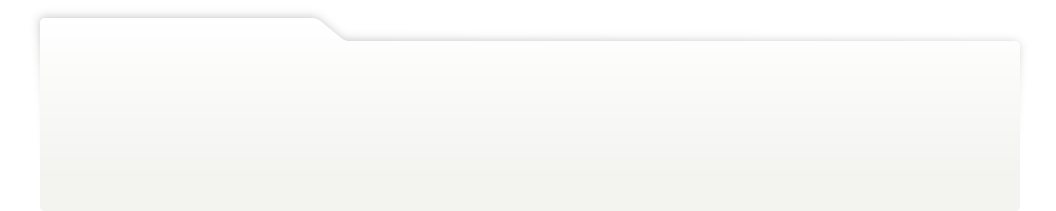
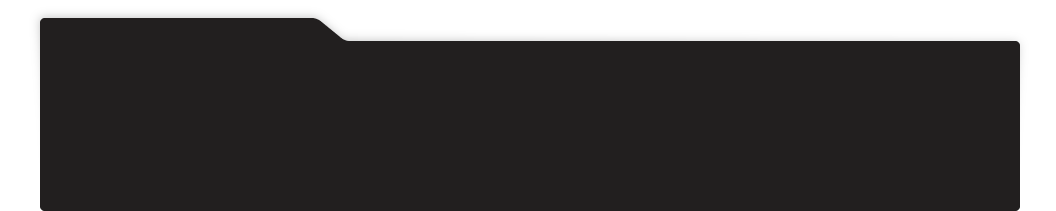
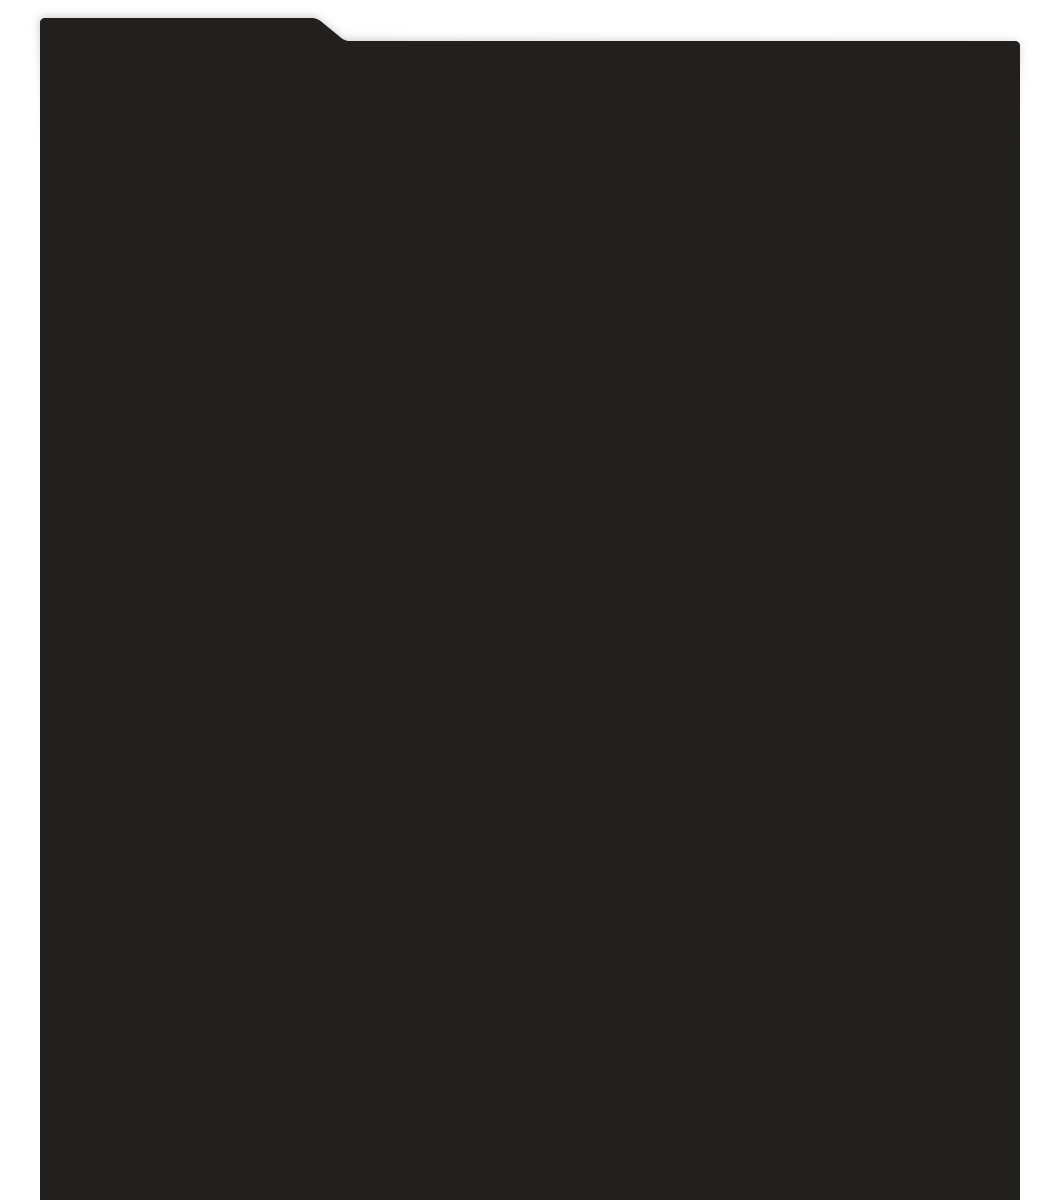
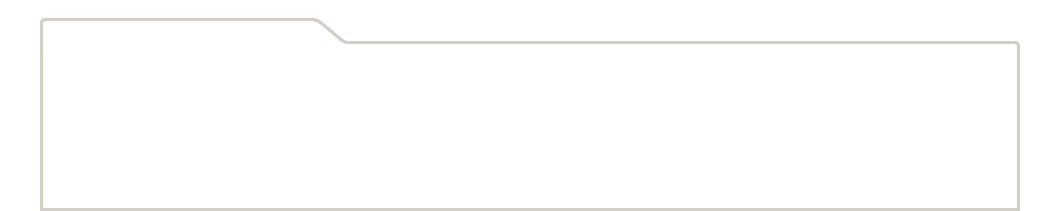
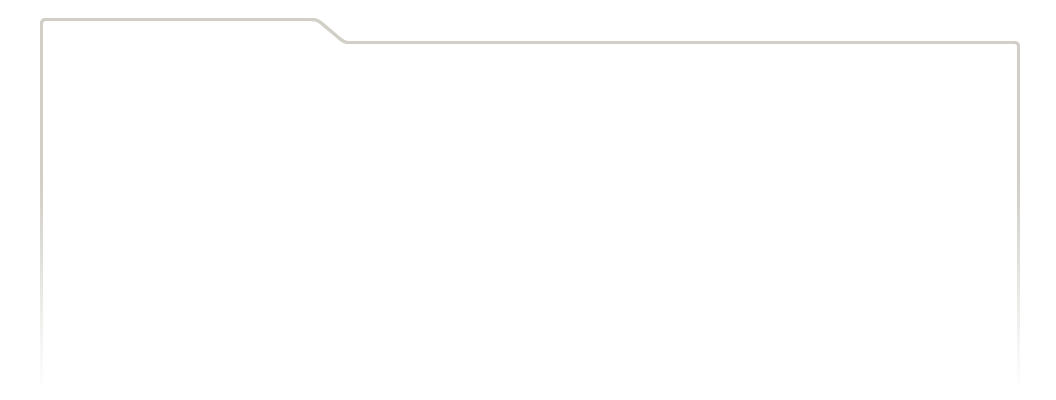
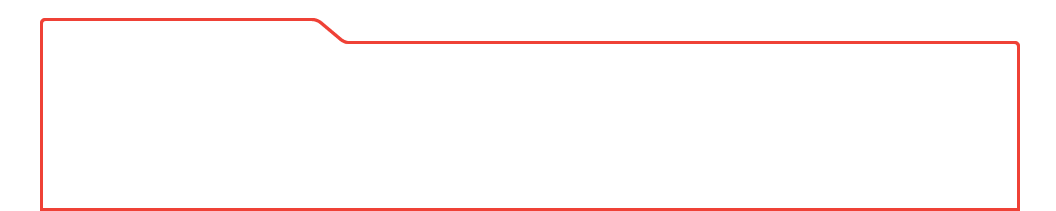
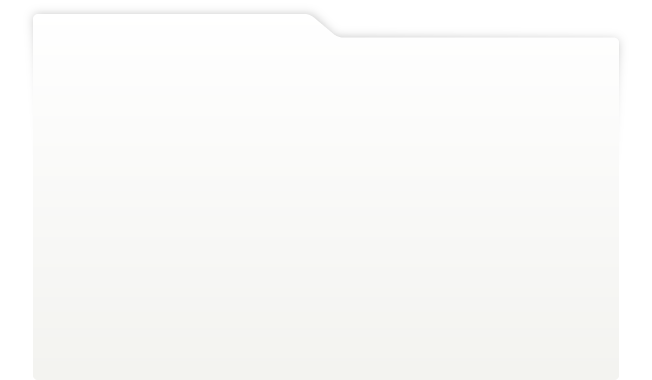
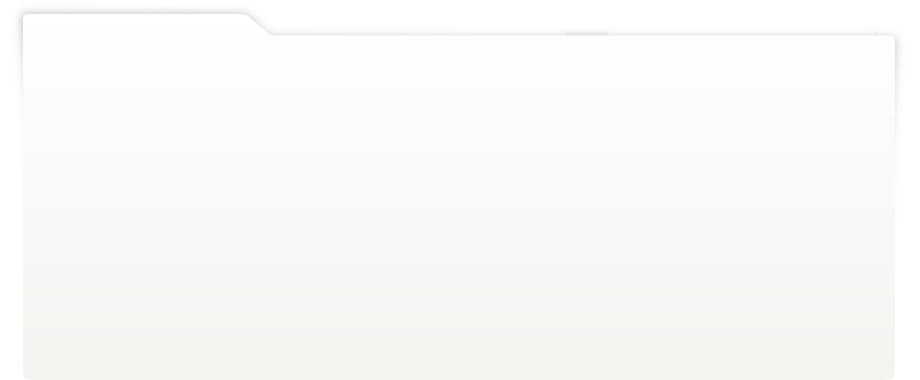
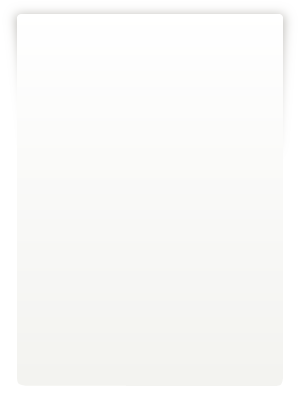
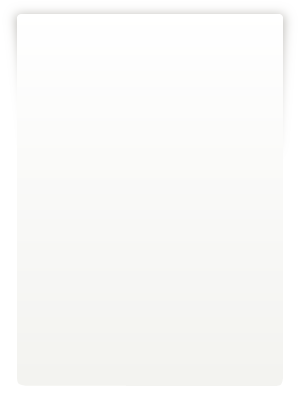
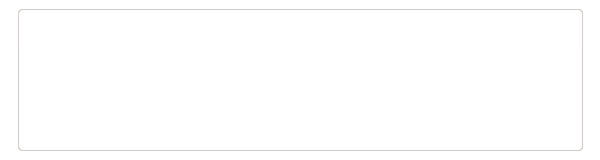
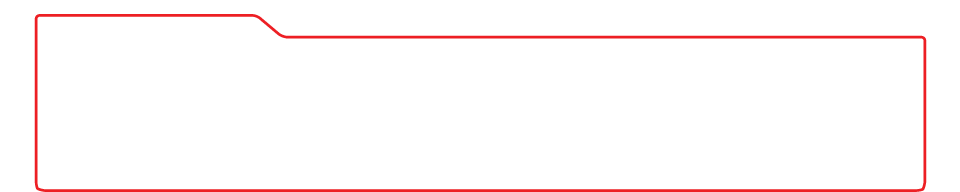
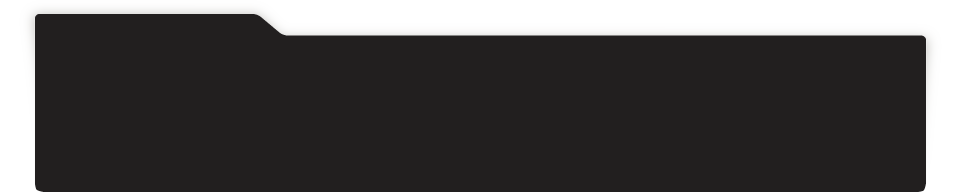
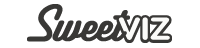
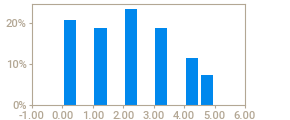
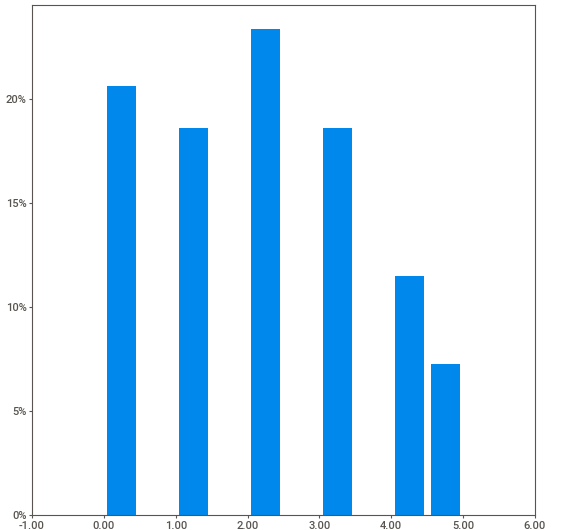
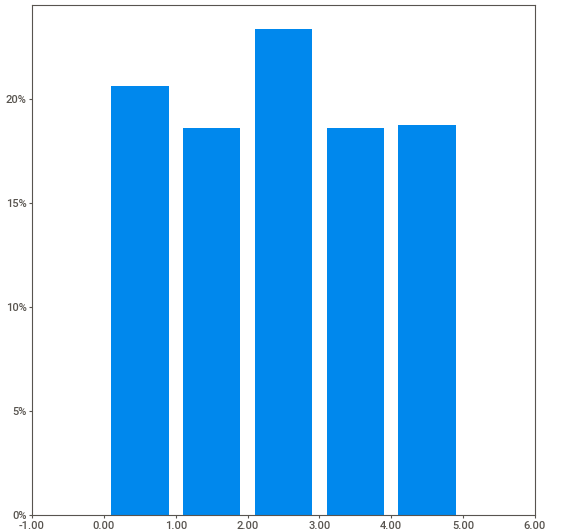
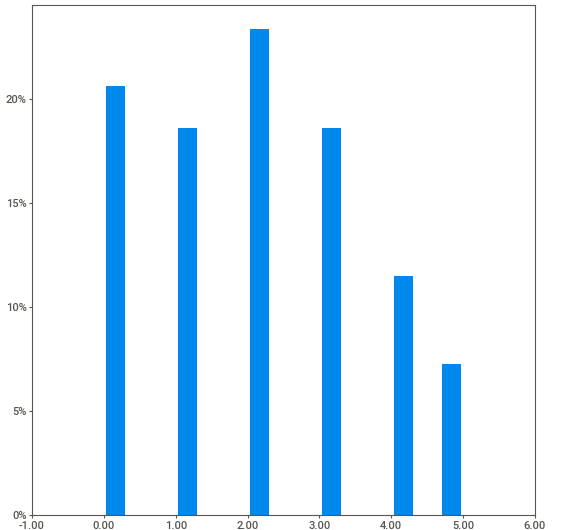
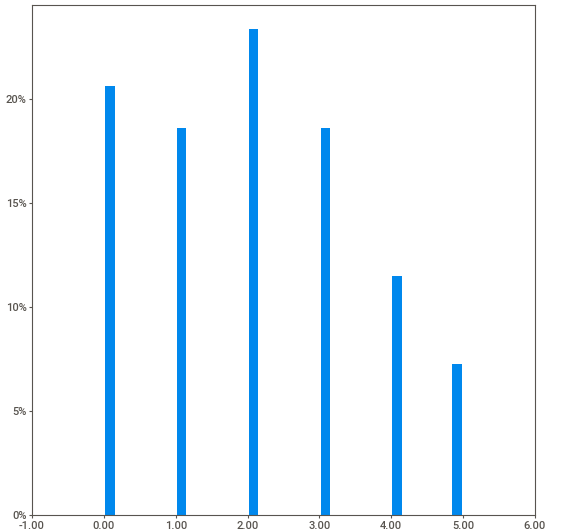
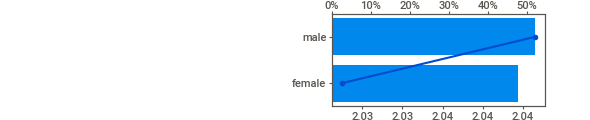
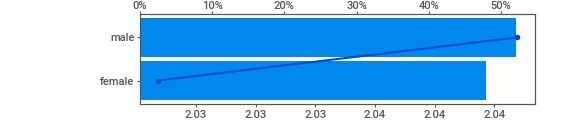
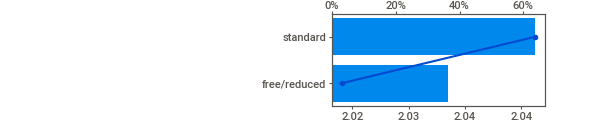
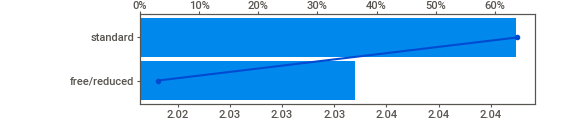
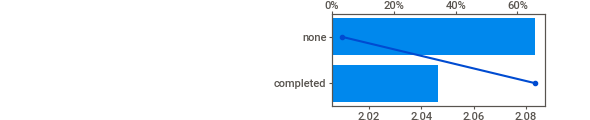
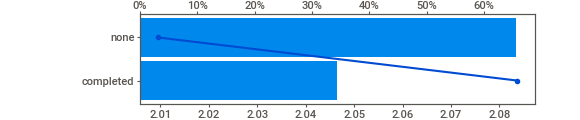
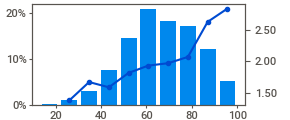
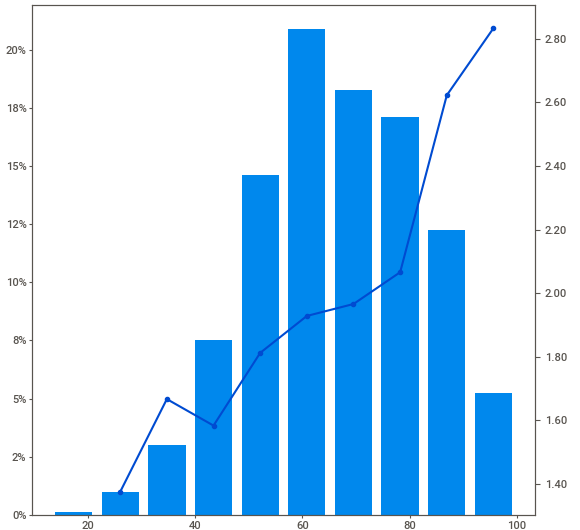
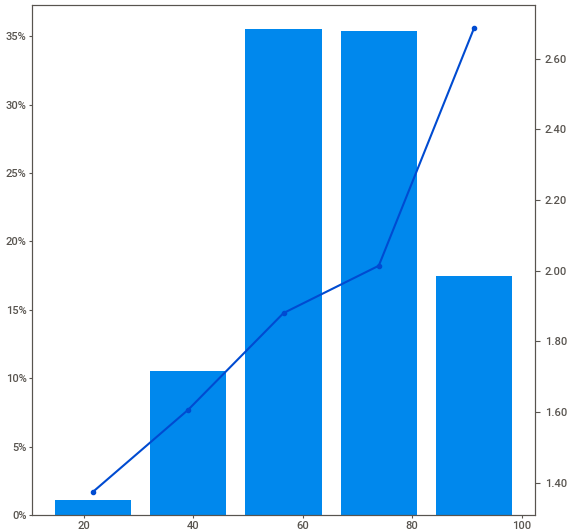
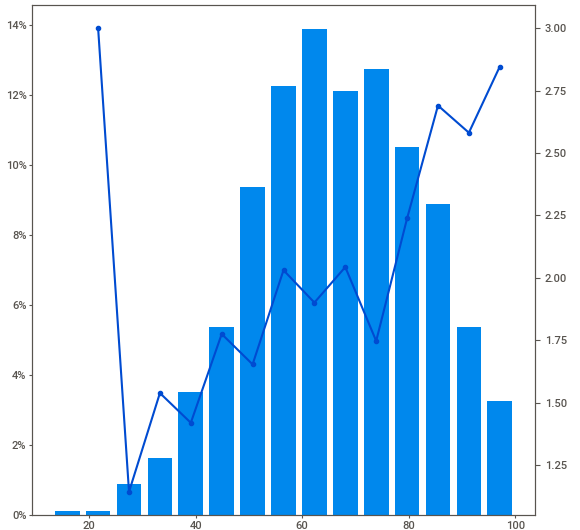
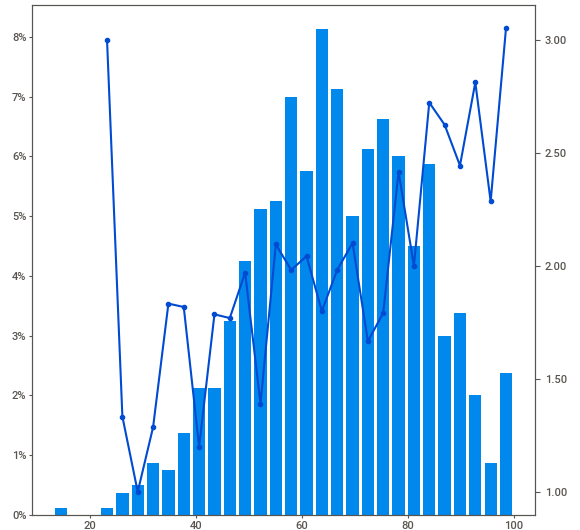
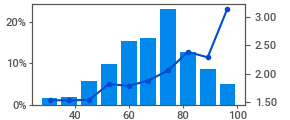
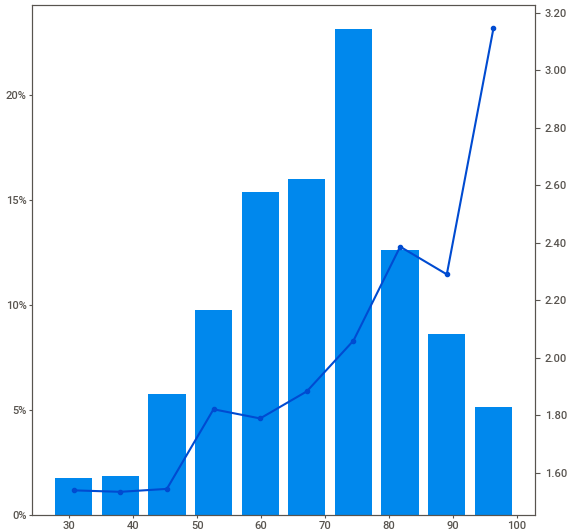
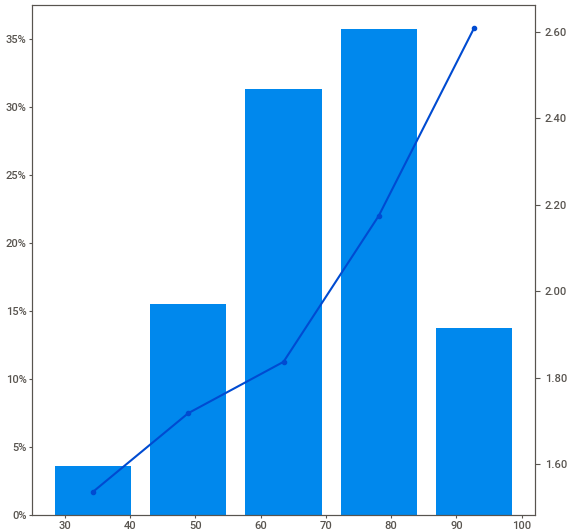
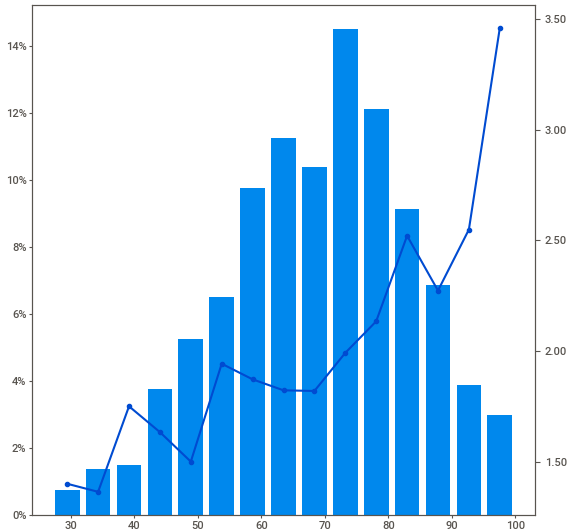
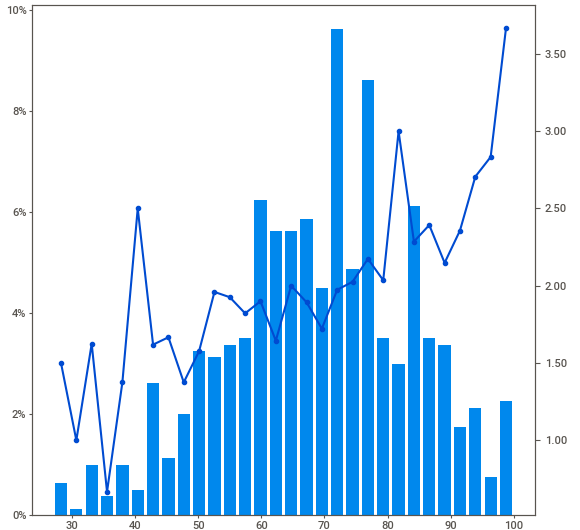
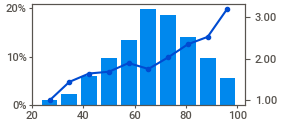
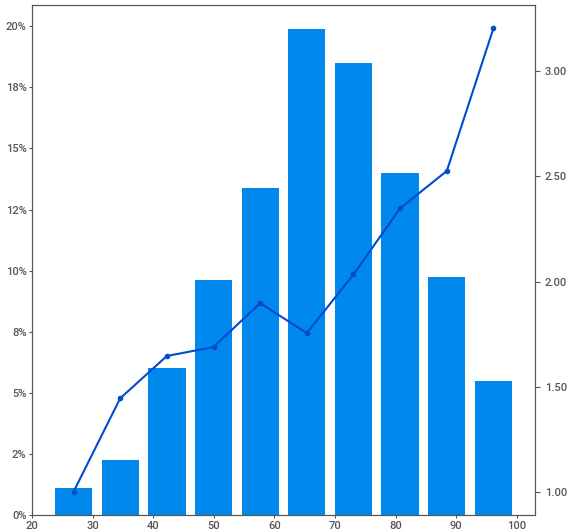
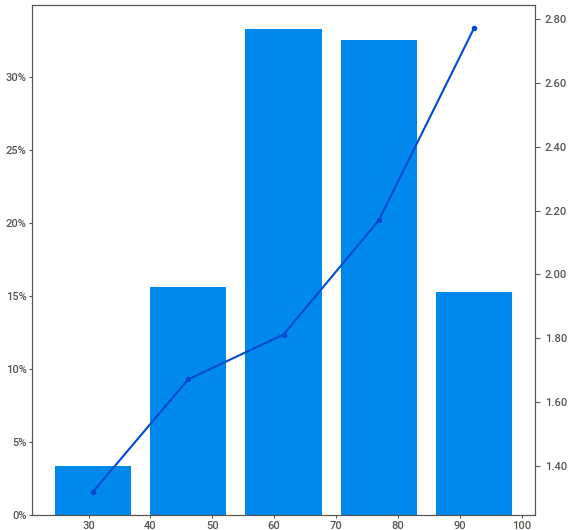
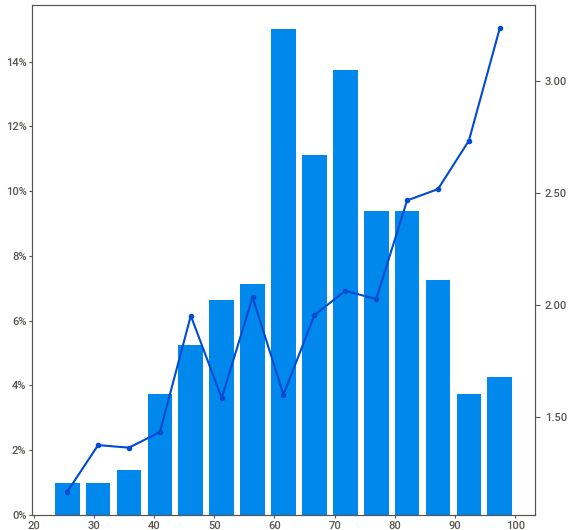
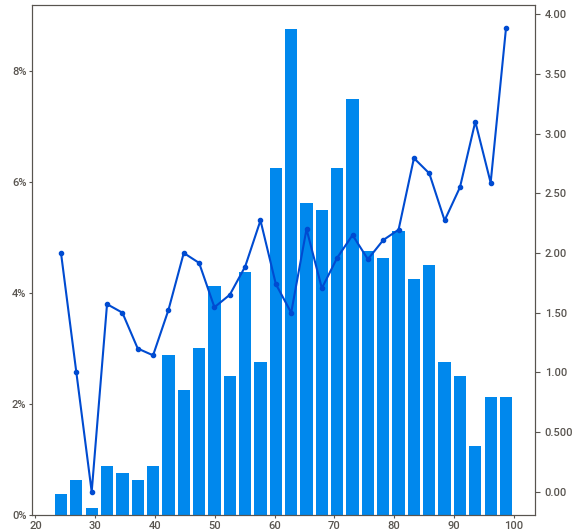
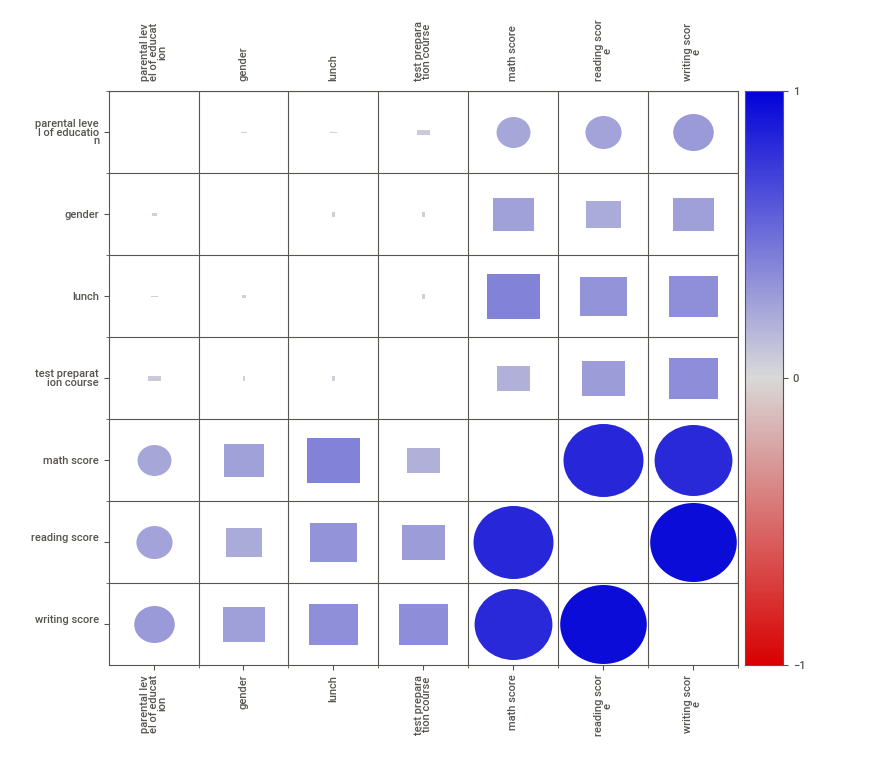
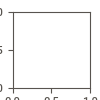

Report 'C:\Users\march\000 Treball Ju`yter 000\Hackathons\\-Hackathon_Talent_Squad_III_DS\train_EDA.html' was saved to storage.


In [8]:
#display the train report
acad_Yield_train_report.show_notebook( w=None, 
                                        h=None, 
                                        scale=None,
                                        layout='vertical',
                                        filepath='C:\\Users\\march\\000 Treball Ju`yter 000\\Hackathons\\\-Hackathon_Talent_Squad_III_DS\\train_EDA.html')


In [9]:
comparison_report = sv.compare([acad_Yield_train, "Training Data"], [acad_Yield_test, "Test Data"], "parental level of education", feature_config)

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:02 -> (00:00 left)



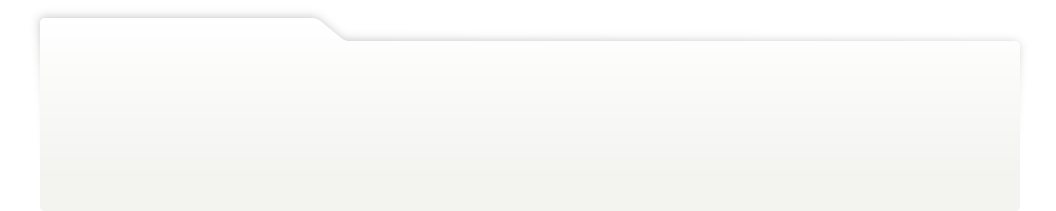
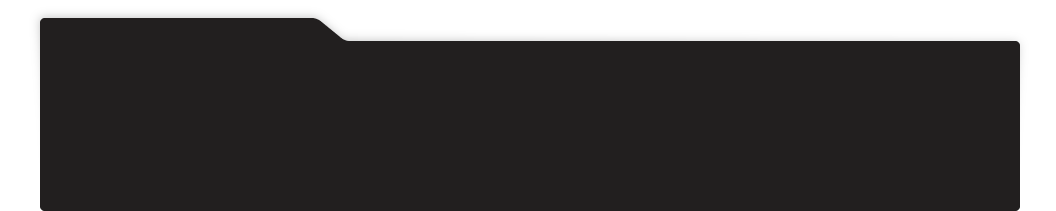
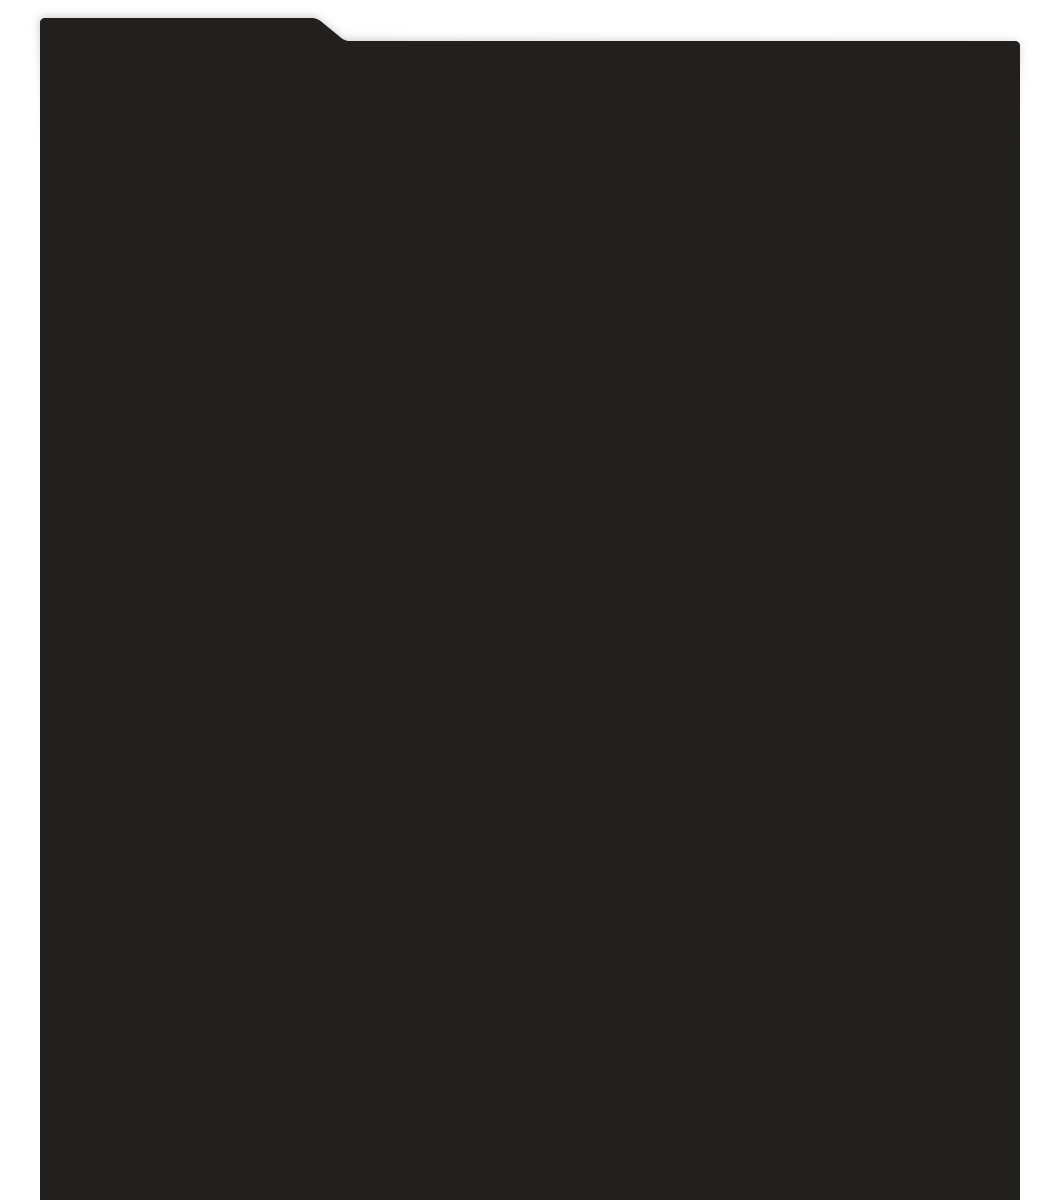
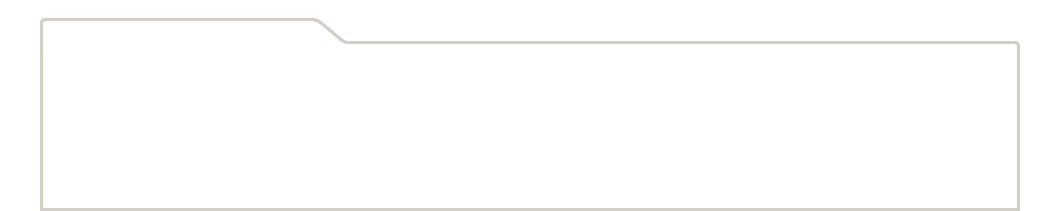
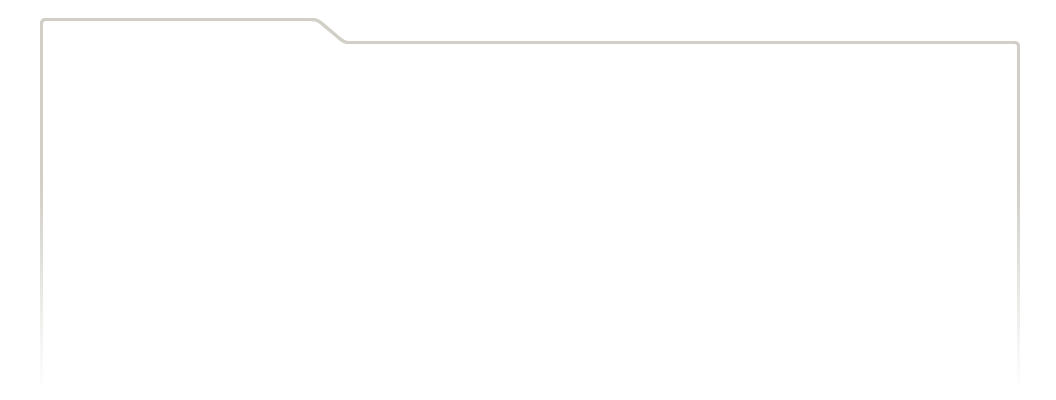
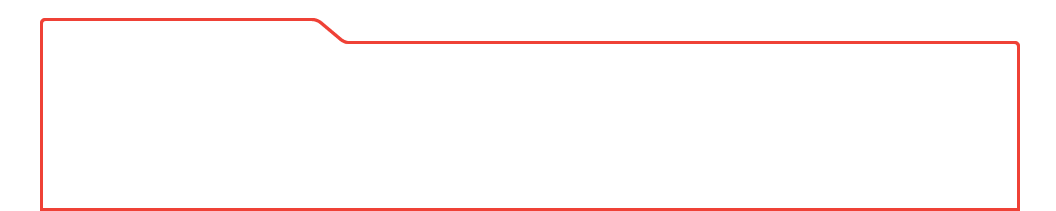
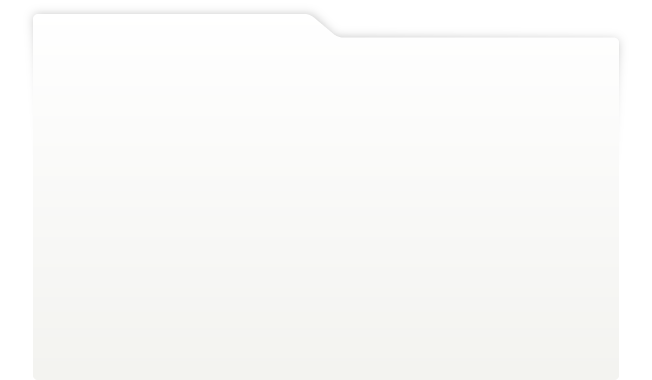
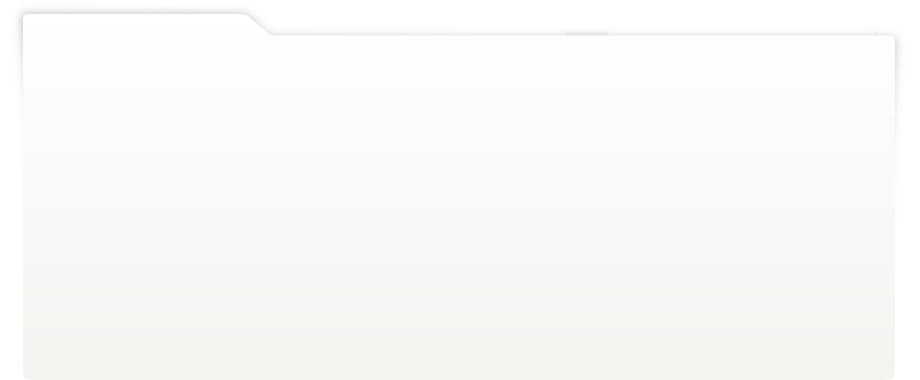
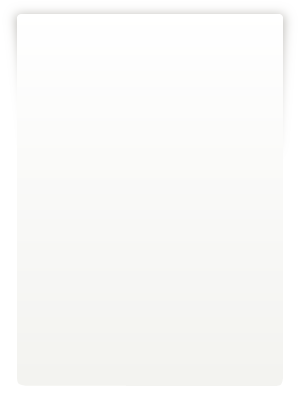
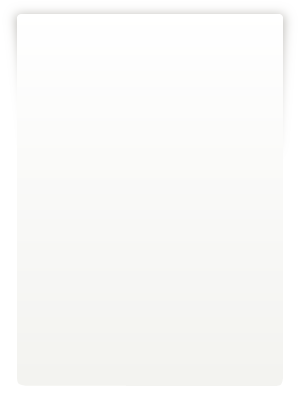
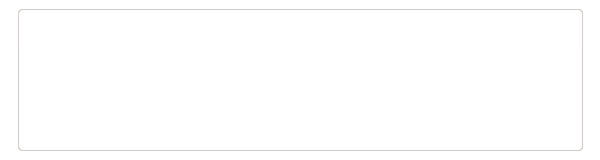
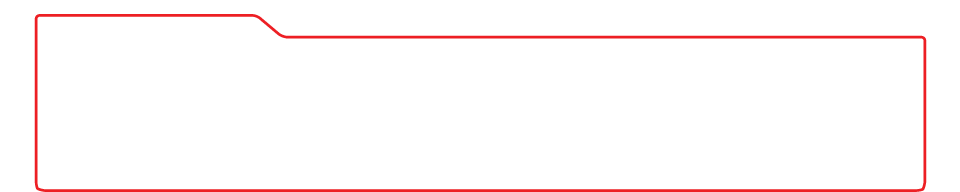
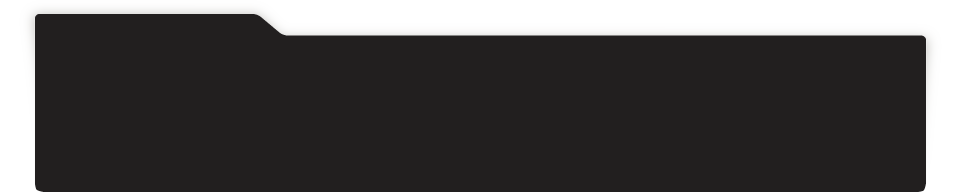
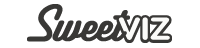
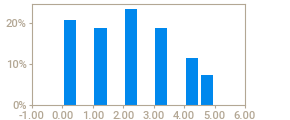
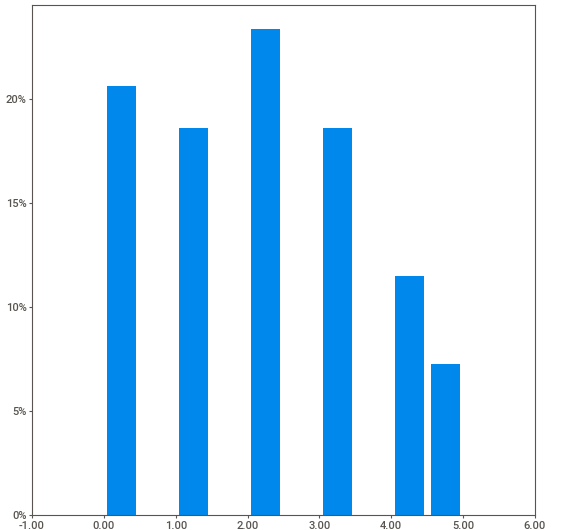
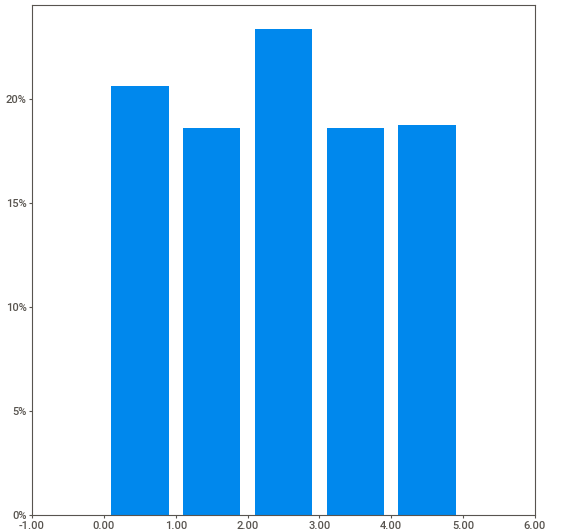
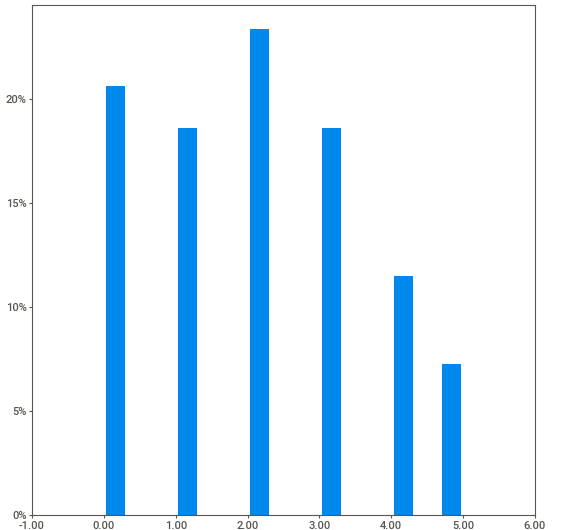
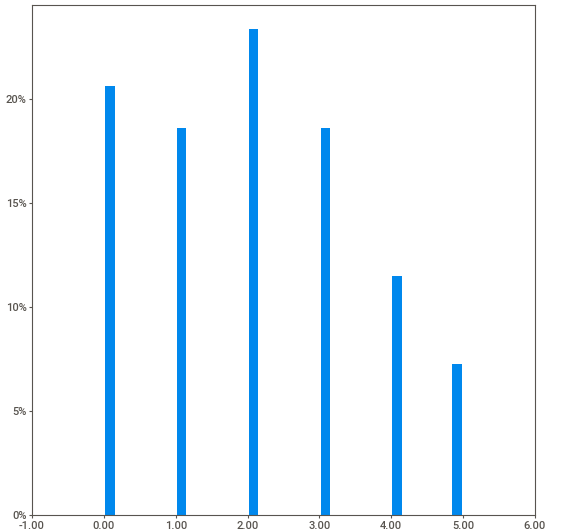
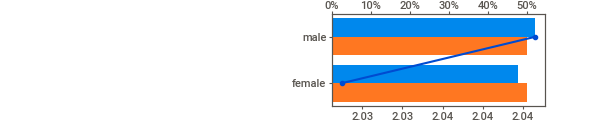
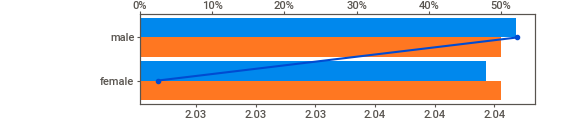
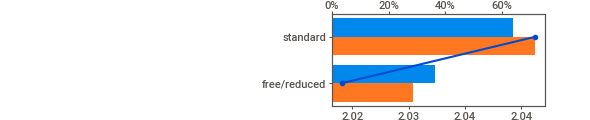
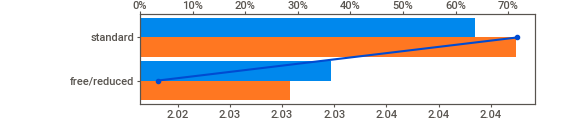
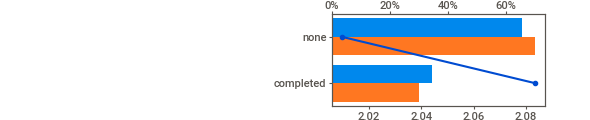
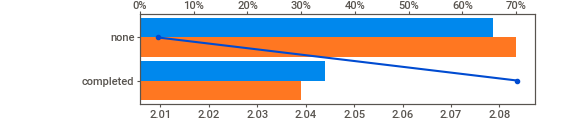
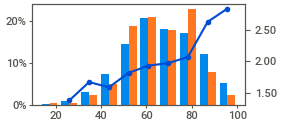
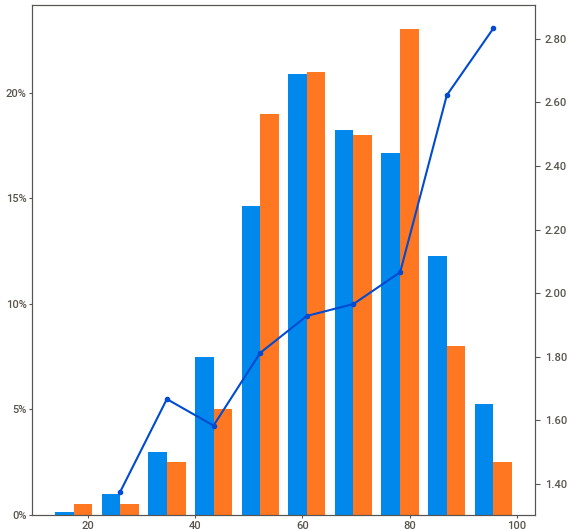
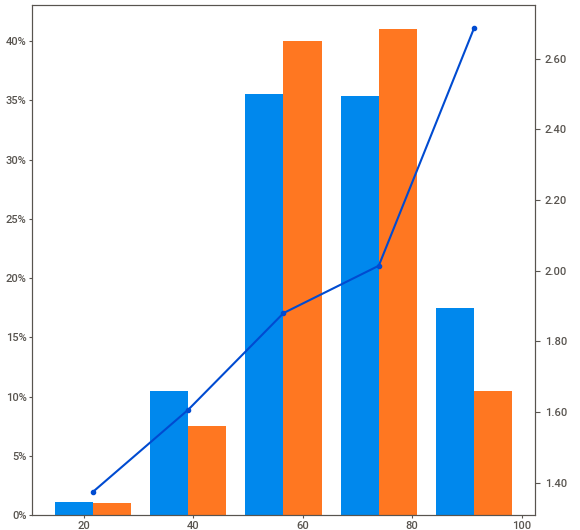
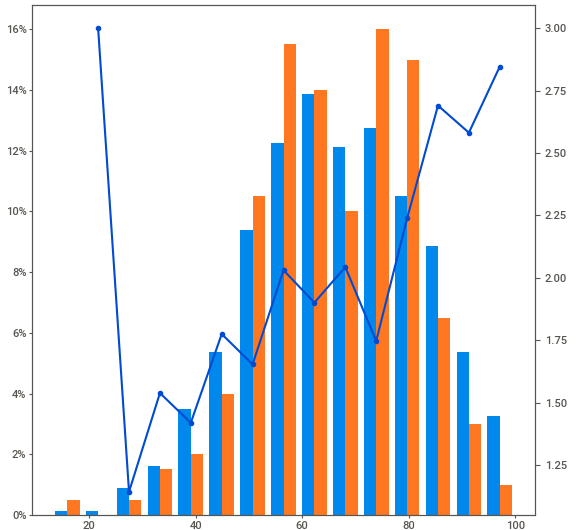
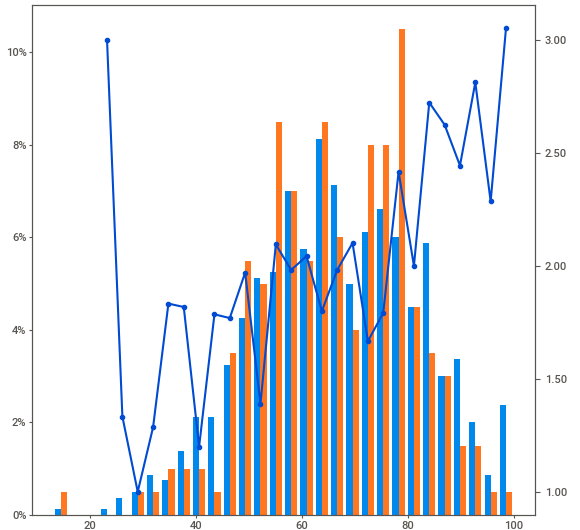
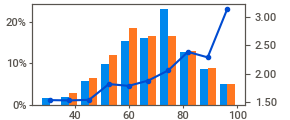
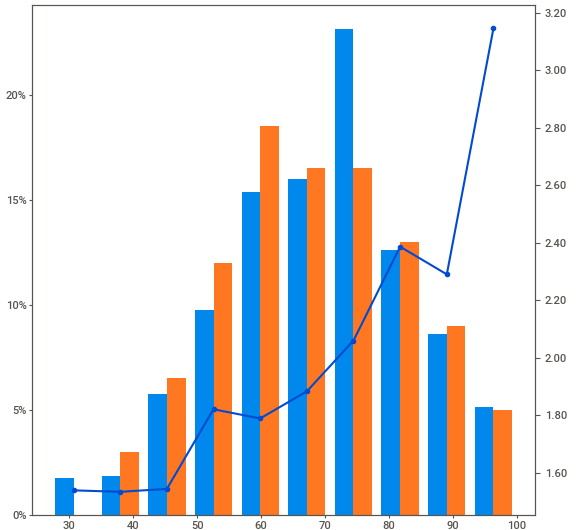
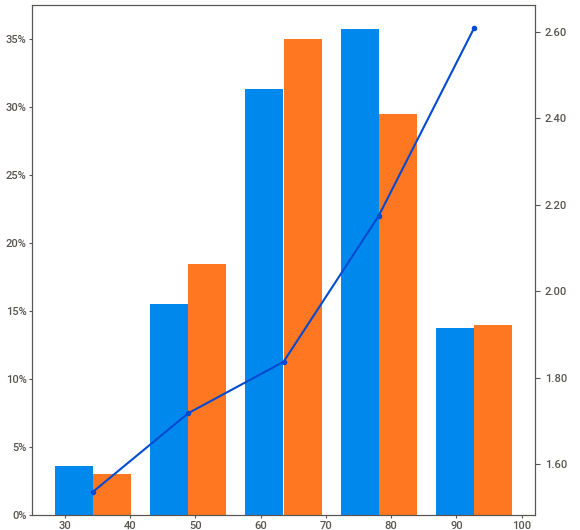
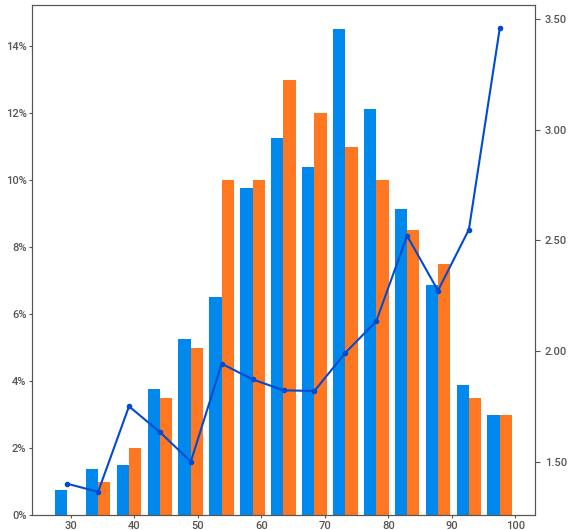
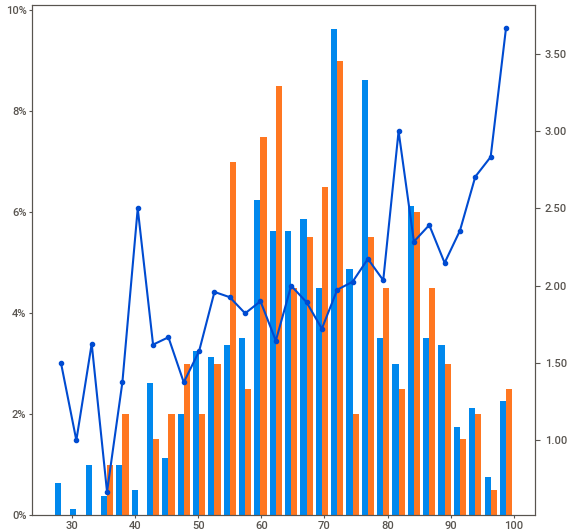
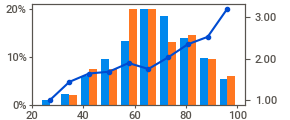
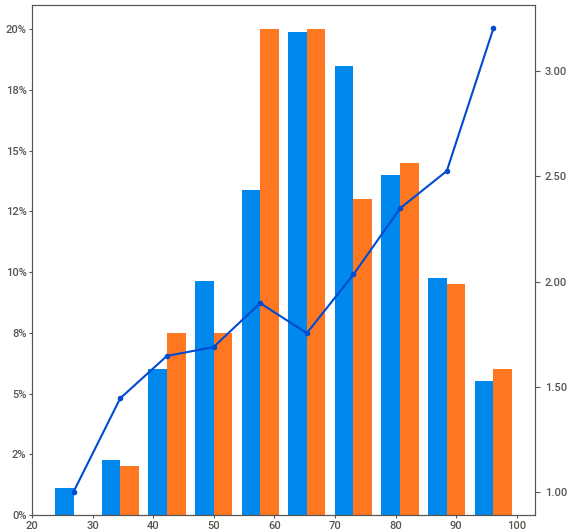
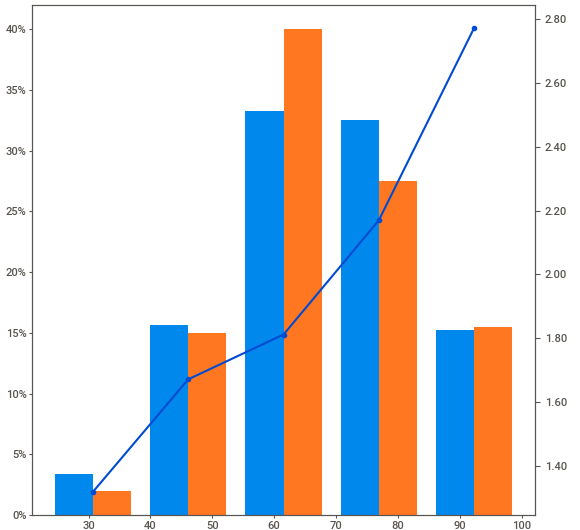
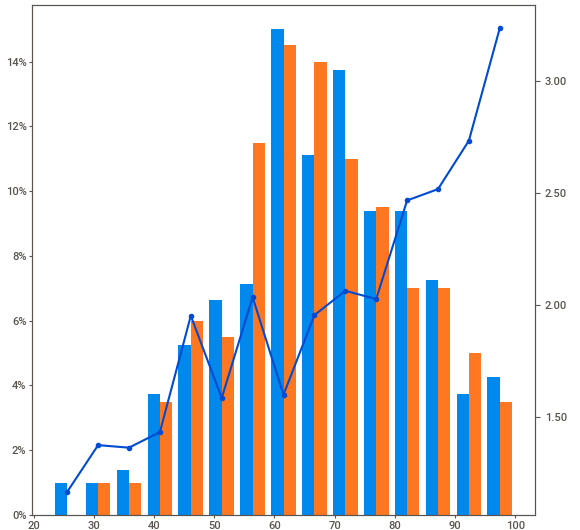
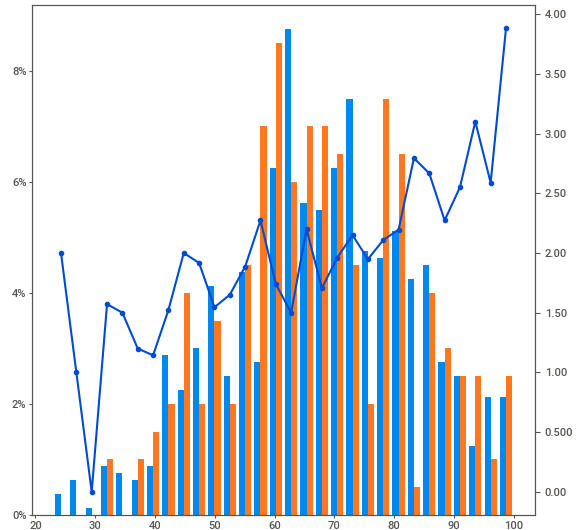
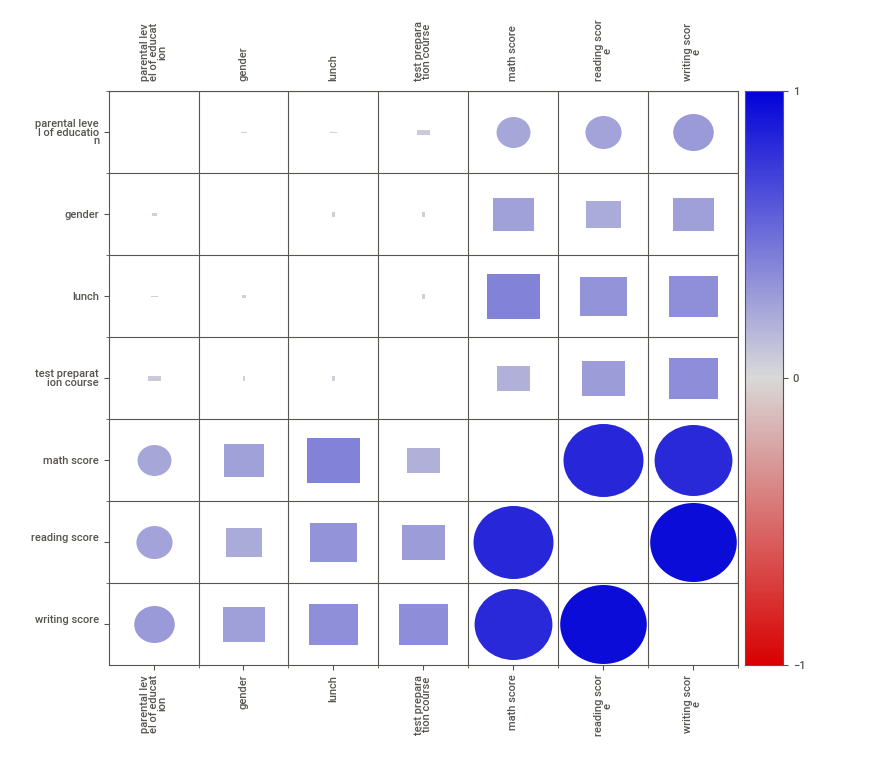
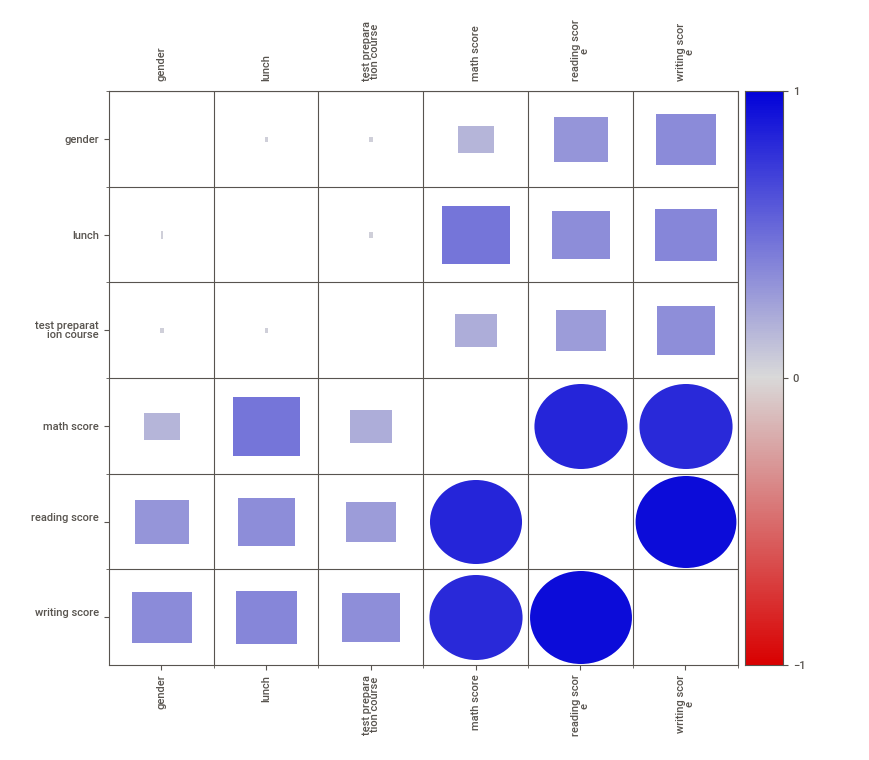

Report 'C:\Users\march\000 Treball Ju`yter 000\Hackathons\\-Hackathon_Talent_Squad_III_DS\test_vs_train_EDA.html' was saved to storage.


In [10]:
#display the train report
comparison_report.show_notebook( w=None, 
                                h=None, 
                                scale=None,
                                layout='vertical',
                                filepath='C:\\Users\\march\\000 Treball Ju`yter 000\\Hackathons\\\-Hackathon_Talent_Squad_III_DS\\test_vs_train_EDA.html')

## Gender

In [11]:
import math

In [133]:
df = acad_Yield_train

df_sex_ple = pd.crosstab(df['parental level of education'], df['gender'], margins=True)
#df_sex_ple['log_female' ]= [math.log(x) for x in df_sex_ple.female]
#df_sex_ple['log_male'] = [math.log(x) for x in df_sex_ple.male]

df_sex_ple


gender,female,male
parental level of education,,
0,77,88
1,84,65
2,82,105
3,64,85
4,43,49
5,33,25


In [62]:
labels  = [ 'Education level ' + str(x) for x in list(df_sex_ple.index[:6])]

([<matplotlib.patches.Wedge at 0x1a9e92a8408>,
 [Text(-0.6639115279373682, 0.8770527253659663, 'Education level 0'),
  Text(-1.0474889605560305, -0.33580779846996867, 'Education level 1'),
  Text(0.07064495316570209, -1.1979187328830851, 'Education level 2'),
  Text(1.079698216475819, -0.21036102618816005, 'Education level 3'),
  Text(0.8018654852284746, 0.7530018217768821, 'Education level 4'),
  Text(0.24838138653294492, 1.0715907272946943, 'Education level 5')],
 [Text(-0.3621335606931099, 0.4783923956541634, '21%'),
  Text(-0.5713576148487438, -0.18316789007452833, '19%'),
  Text(0.041209556013326216, -0.6987859275151329, '23%'),
  Text(0.5889262998959012, -0.11474237792081456, '19%'),
  Text(0.43738117376098606, 0.4107282664237538, '12%'),
  Text(0.13548075629069722, 0.5845040330698332, '7%')])

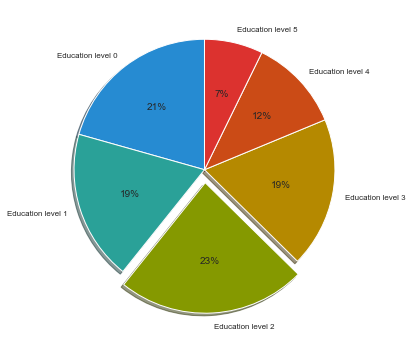

In [67]:

plt.pie(data=df_sex_ple[:6], x= 'All', labels = labels, explode=(0,0,0.1,0,0,0),  autopct='%.0f%%', shadow=True, startangle=90)

The education level most populated is level 2 with a population of 23%. Predictions accuracy lower than 23% performs worse than allways predicting majority label. 

In [68]:
df_sex_ple = df_sex_ple.reset_index()
df_sex_ple

gender,parental level of education,female,male,All
0,0,77,88,165
1,1,84,65,149
2,2,82,105,187
3,3,64,85,149
4,4,43,49,92
5,5,33,25,58
6,All,383,417,800


In [69]:
df_sex_ple.columns

Index(['parental level of education', 'female', 'male', 'All'], dtype='object', name='gender')

In [70]:
df_sex_ple.drop(6, axis=0, inplace=True)
df_sex_ple.drop('All', axis=1, inplace=True)


In [71]:

df_sex_ple['female_score'] =df_sex_ple['parental level of education']*df_sex_ple['female']

In [72]:

df_sex_ple['male_score'] =df_sex_ple['parental level of education']*df_sex_ple['male']
df_sex_ple

gender,parental level of education,female,male,female_score,male_score
0,0,77,88,0,0
1,1,84,65,84,65
2,2,82,105,164,210
3,3,64,85,192,255
4,4,43,49,172,196
5,5,33,25,165,125


In [73]:
trim = [(x-2.028720626631854)**2 for x in df_sex_ple['parental level of education']]
math.sqrt((trim * df_sex_ple.female).sum()/ df_sex_ple.female.sum())

1.5538078158958504

In [74]:
math.sqrt((trim * df_sex_ple.male).sum()/ df_sex_ple.male.sum())


1.4872499457856743

In [75]:
df_sex_ple.male_score.sum()/df_sex_ple.male.sum()

2.0407673860911273

In [76]:
df_sex_ple.female_score.sum()/df_sex_ple.female.sum()

2.028720626631854

No significance difference between male and female students.

In [32]:
print (f'Female {df_sex_ple.iloc[:6,:2].female.mean()}  Male: {df_sex_ple.iloc[:6,:2].male.mean()}')
#df_sex_ple.male

Female 63.833333333333336  Male: 69.5


In [23]:
plt.rcParams.update({
    "lines.color": "white",
    "patch.edgecolor": "white",
    "text.color": "black",
    "axes.facecolor": "white",
    "axes.edgecolor": "lightgray",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "grid.color": "lightgray",
    "figure.facecolor": "black",
    "figure.edgecolor": "black",
    "savefig.facecolor": "black",
    "savefig.edgecolor": "black"})
plt.style.use('Solarize_Light2')

In [77]:
sns.set_style('white')

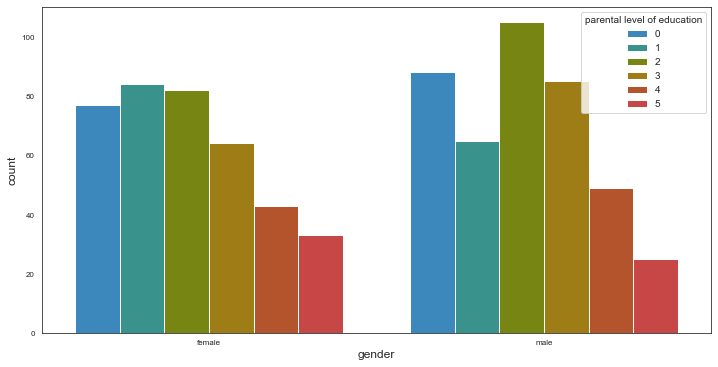

In [78]:
plt.rcParams['figure.figsize'] = (12, 6)
sns.countplot(x='gender', hue='parental level of education', data=df);
plt.show()

Text(0.5, 1.0, 'count')

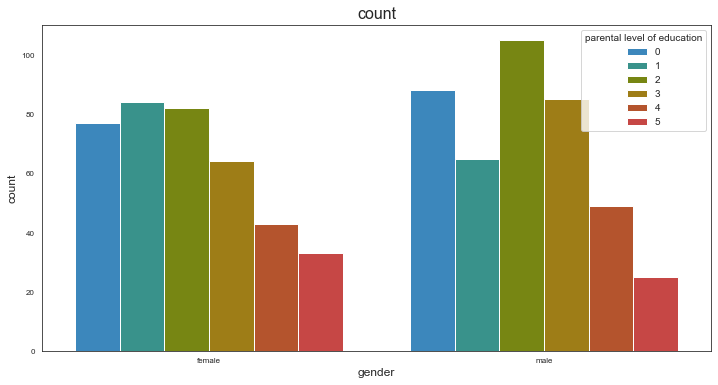

In [79]:

plt.rcParams['figure.figsize'] = (12, 6)
plt.tight_layout ()
a = sns.countplot(x='gender', hue='parental level of education', data=df)
a.set_title('count')
#a.set_title ('genre')

## Lunch

In [80]:
pd.crosstab(df['parental level of education'], df['lunch'], margins=True)

lunch,free/reduced,standard,All
parental level of education,,,
0,58,107,165
1,53,96,149
2,75,112,187
3,56,93,149
4,27,65,92
5,22,36,58
All,291,509,800


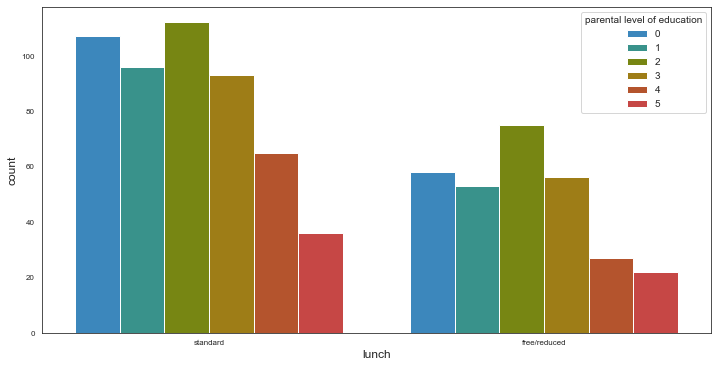

In [81]:

plt.rcParams['figure.figsize'] = (12, 6)
plt.tight_layout ()
a = sns.countplot(x='lunch', hue='parental level of education', data=df)
#a.set_title ('genre')

## Test preparation course

In [82]:
pd.crosstab(df['parental level of education'], df['test preparation course'], margins=True)

test preparation course,completed,none,All
parental level of education,,,
0,47,118,165
1,51,98,149
2,71,116,187
3,59,90,149
4,32,60,92
5,15,43,58
All,275,525,800


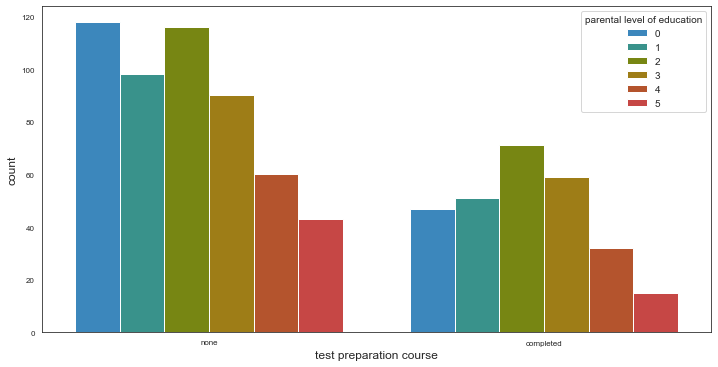

In [83]:
plt.rcParams['figure.figsize'] = (12, 6)
plt.tight_layout ()
a = sns.countplot(x='test preparation course', hue='parental level of education', data=df)

In [84]:
df = acad_Yield_train
df.columns

Index(['gender', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

Text(0.5, 0.98, 'Pair plot of score with parental level of education differentiation')

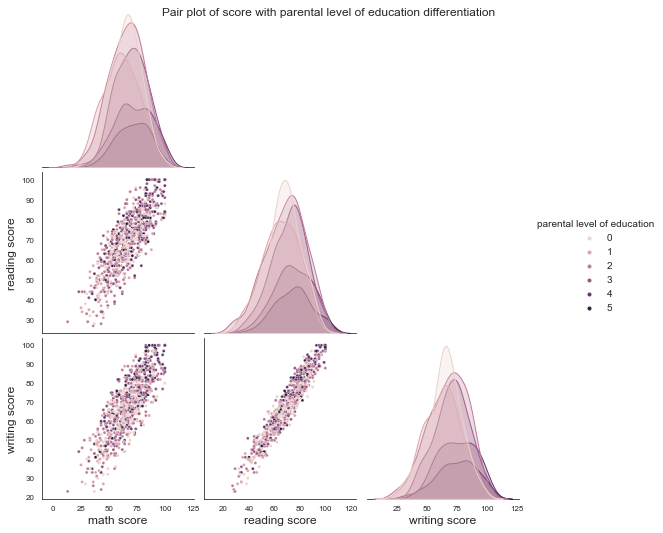

In [85]:
pairplot_education = sns.pairplot(df, corner=True,hue='parental level of education')
pairplot_education.fig.suptitle('Pair plot of score with parental level of education differentiation')

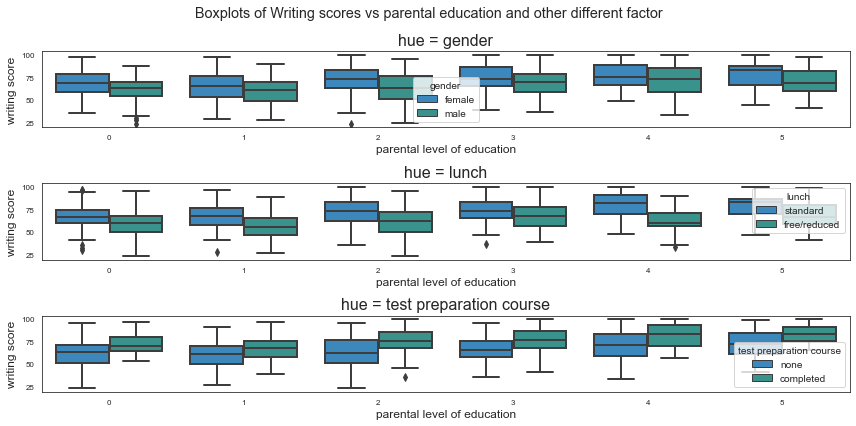

In [35]:
list_hues = ['gender', 'lunch', 'test preparation course']


fig, axs = plt.subplots(nrows=3)
my_pal = {"versicolor": "g", "setosa": "b", "virginica":"m"}
i=0
fig.suptitle('Boxplots of Writing scores vs parental education and other different factor' , fontsize="x-large")
fig.set_in_layout
for hue in list_hues:
    sns.boxplot(data=df, x="parental level of education", y="writing score", hue=hue, ax=axs[i] ).set_title (f'hue = {hue}') 
    i+=1
fig.tight_layout()

Regarding the writing score, next points were observed from the previous boxplots graphs:
  * Men scored slightly lower than women 
  * Students with free/reduced scored lunch slightly lower than standard's.
  * Students who did the preparation course scored slightly better than the ones who didn't.


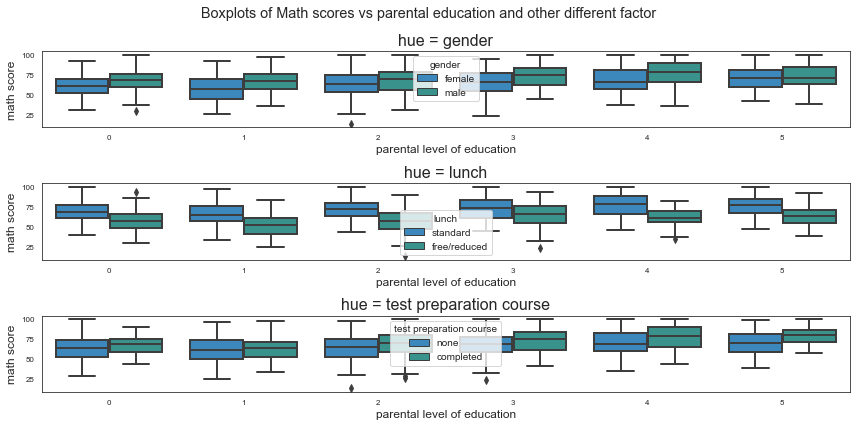

In [36]:
fig, axs = plt.subplots(nrows=3)

i=0
fig.suptitle('Boxplots of Math scores vs parental education and other different factor' , fontsize="x-large")
fig.set_in_layout
for hue in list_hues:
    sns.boxplot(data=df, x="parental level of education", y="math score", hue=hue, ax=axs[i] ).set_title (f'hue = {hue}') 
    i+=1
fig.tight_layout()

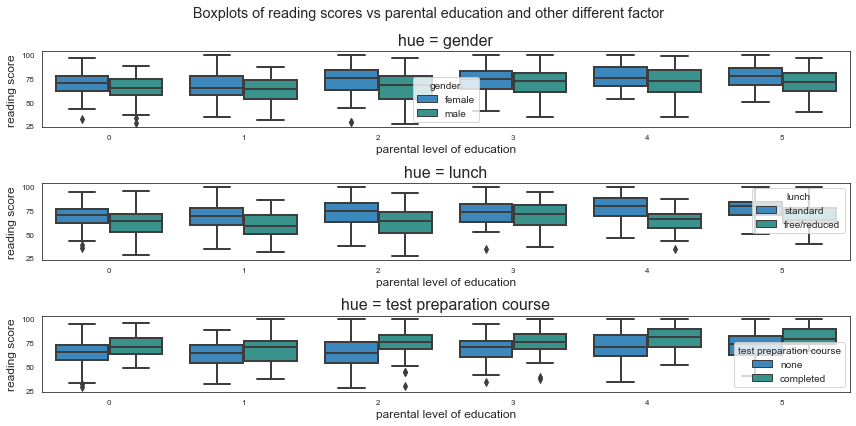

In [37]:
fig, axs = plt.subplots(nrows=3)

i=0
fig.suptitle('Boxplots of reading scores vs parental education and other different factor' , fontsize="x-large")
fig.set_in_layout
for hue in list_hues:
    sns.boxplot(data=df, x="parental level of education", y="reading score", hue=hue, ax=axs[i] ).set_title (f'hue = {hue}') 
    i+=1
fig.tight_layout()

In [38]:
    
sns.regplot(x='value', y='wage', data=df_melt, ax=axs[0])
sns.regplot(x='value', y='wage', data=df_melt, ax=axs[1])
sns.boxplot(x='education',y='wage', data=df_melt, ax=axs[2])


NameError: name 'df_melt' is not defined

<AxesSubplot:xlabel='parental level of education', ylabel='writing score'>

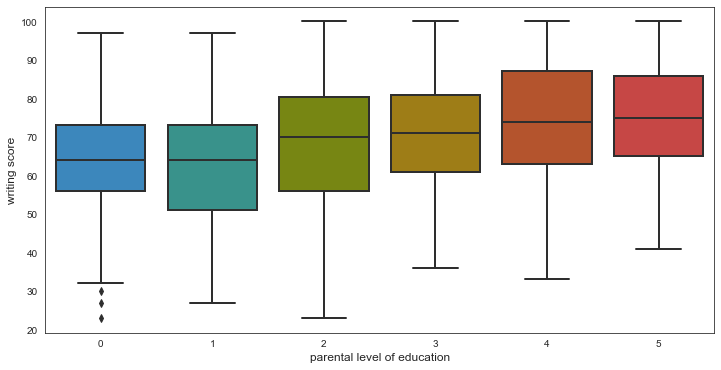

In [107]:
sns.boxplot(data=df, x="parental level of education", y="writing score") #hue="time",  style="time"

<AxesSubplot:xlabel='parental level of education', ylabel='reading score'>

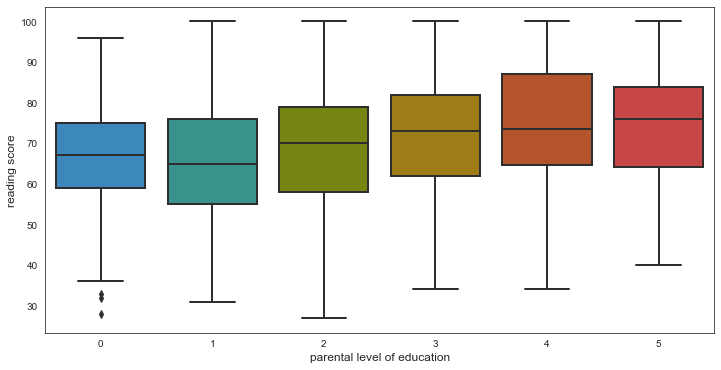

In [109]:
sns.boxplot(data=df, x="parental level of education", y="reading score") 

<AxesSubplot:xlabel='parental level of education', ylabel='math score'>

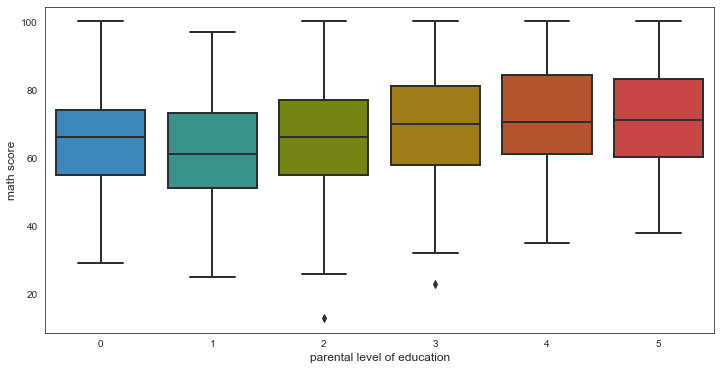

In [110]:
sns.boxplot(data=df, x="parental level of education", y="math score") 

([<matplotlib.patches.Wedge at 0x1a9e34c51c8>,
 [Text(1.0999979518890353, 0.0021226963814488693, ''),
  Text(1.0999262688060814, 0.01273590163012217, ''),
  Text(1.099705085108487, 0.025470095927093758, ''),
  Text(1.0995985945417843, 0.029714152886003216, ''),
  Text(1.0994081488224203, 0.036079388892538325, ''),
  Text(1.0989167267834552, 0.04880602007475203, ''),
  Text(1.098507264338746, 0.057286911201468435, ''),
  Text(1.0981572142671914, 0.06364536709707978, ''),
  Text(1.0979034000301666, 0.06788316582334651, ''),
  Text(1.0977703600497608, 0.07000168995259033, ''),
  Text(1.0976332321502438, 0.0721199534068728, ''),
  Text(1.097197326105197, 0.07847310104491859, ''),
  Text(1.096215213922456, 0.09117129353554443, ''),
  Text(1.0948836919232243, 0.105970284328061, ''),
  Text(1.0935833699243827, 0.11863984585640262, ''),
  Text(1.0923877724581819, 0.12918573676629871, ''),
  Text(1.0910904788648668, 0.13971960109603823, ''),
  Text(1.0902633384314764, 0.1460337388148784, ''),
 

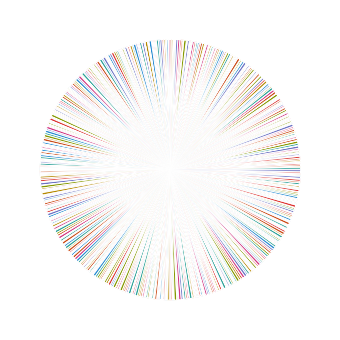

In [41]:
plt.pie(data=df, x="parental level of education")

In [104]:
df.columns

Index(['gender', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [129]:
df[(df.gender=='male')& (df.lunch=='standard') & (df['test preparation course']=='none')]

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score
866,male,4,standard,none,79,57,58
91,male,1,standard,none,74,71,70
166,male,4,standard,none,66,64,58
44,male,0,standard,none,100,88,87
517,male,0,standard,none,49,36,32
...,...,...,...,...,...,...,...
132,male,2,standard,none,65,63,57
367,male,1,standard,none,64,67,64
103,male,0,standard,none,66,67,67
584,male,4,standard,none,100,84,88


gender: male --- lunch : standard --- test preparation course : none


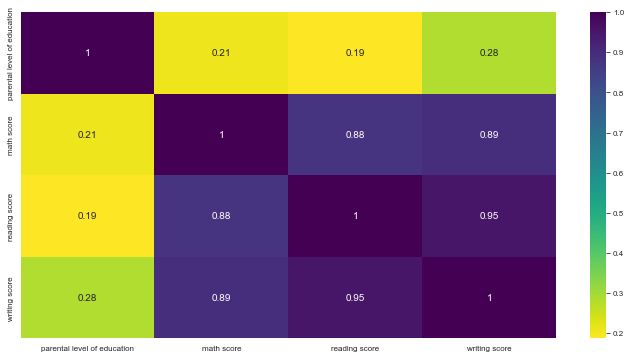

gender: male --- lunch : standard --- test preparation course : completed


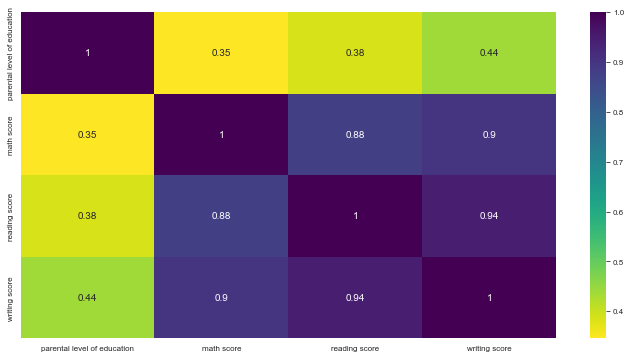

gender: male --- lunch : free/reduced --- test preparation course : none


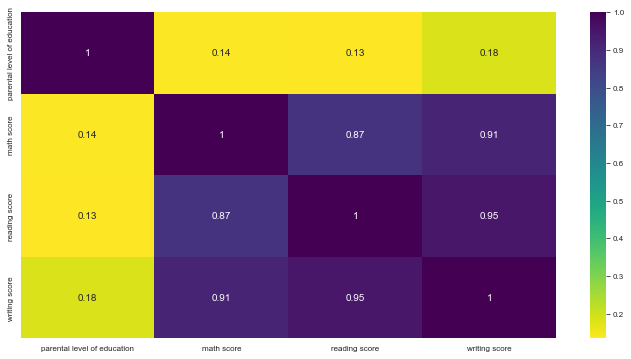

gender: male --- lunch : free/reduced --- test preparation course : completed


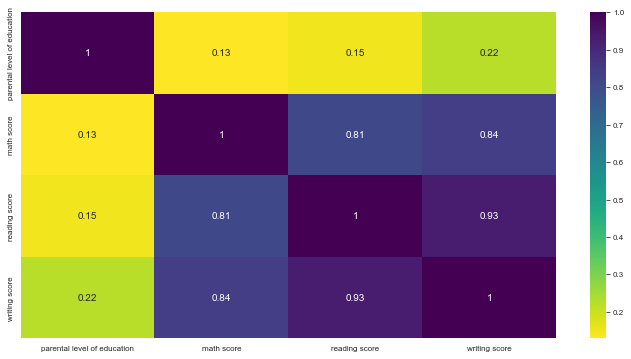

gender: female --- lunch : standard --- test preparation course : none


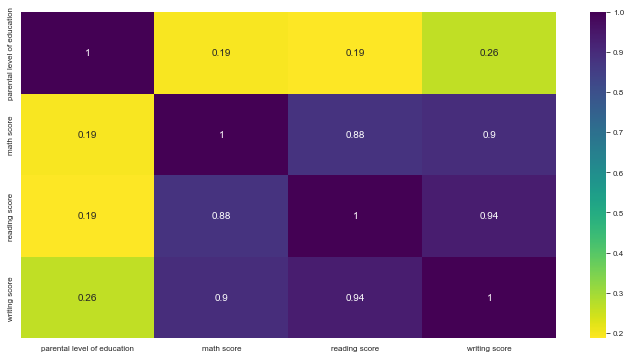

gender: female --- lunch : standard --- test preparation course : completed


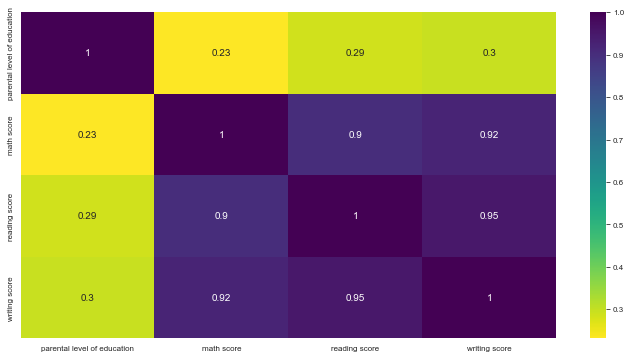

gender: female --- lunch : free/reduced --- test preparation course : none


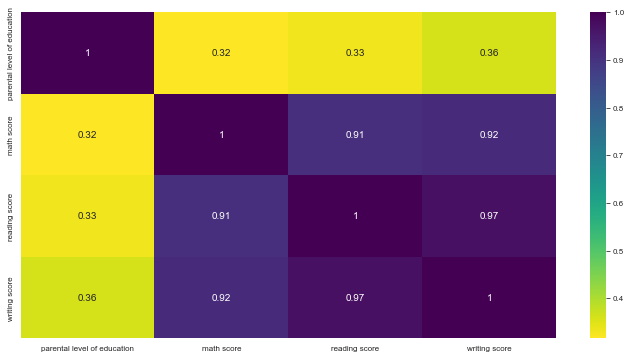

gender: female --- lunch : free/reduced --- test preparation course : completed


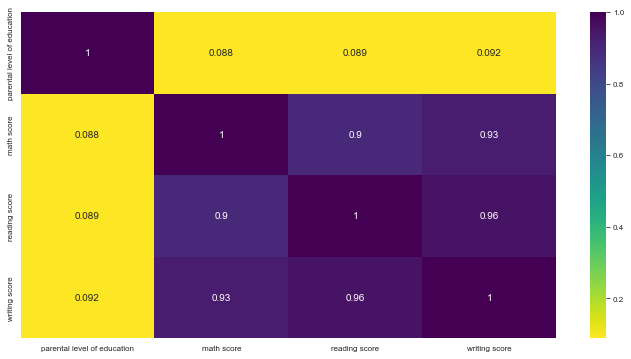

In [87]:
dict_df = {}
for gender in ['male','female']:
    dict_df[gender]={}

    for lunch in ['standard', 'free/reduced']:
        dict_df[gender][lunch]={}
        
        for test_preparation_course in ['none', 'completed']:
            dict_df[gender][lunch][test_preparation_course] = df[(df.gender==gender)& (df.lunch==lunch) & (df['test preparation course']==test_preparation_course)][['parental level of education', 'math score', 'reading score', 'writing score' ]]
            print (f'gender: {gender} --- lunch : {lunch} --- test preparation course : {test_preparation_course}')
            sns.heatmap(dict_df[gender][ lunch][test_preparation_course].corr(), cmap = 'viridis_r', annot=True)
            plt.show()

As seen from previous 

<AxesSubplot:>

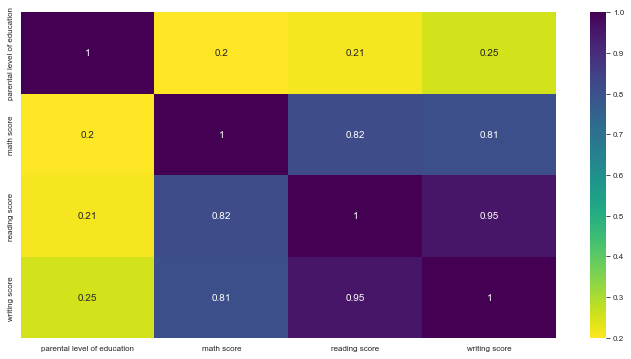

In [88]:
sns.heatmap(df[['parental level of education', 'math score','reading score', 'writing score',]].corr(), cmap = 'viridis_r', annot=True)

In [89]:
df.columns


Index(['gender', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

gender: male --- lunch : standard --- test preparation course : none
Average : 1.9024390243902438


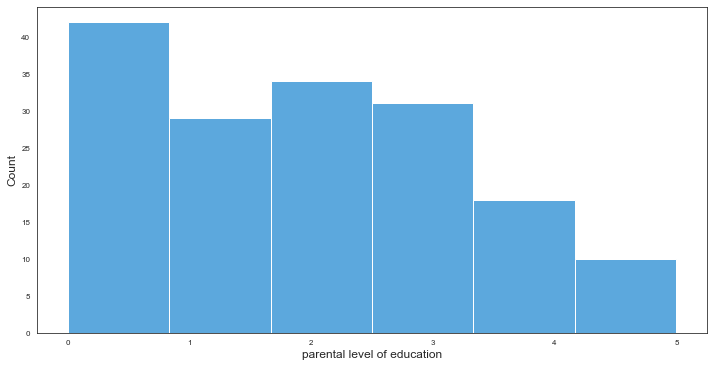

gender: male --- lunch : standard --- test preparation course : completed
Average : 2.202127659574468


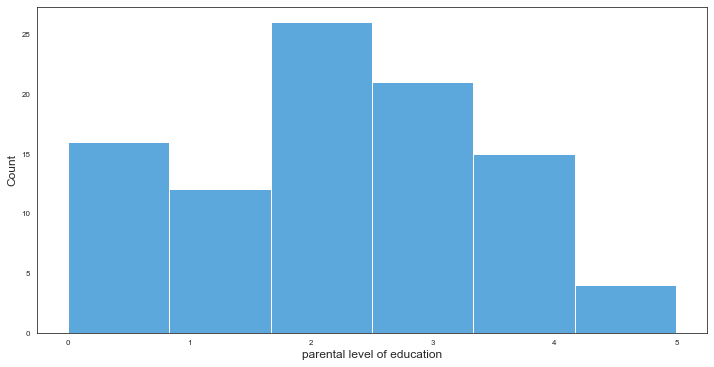

gender: male --- lunch : free/reduced --- test preparation course : none
Average : 2.1037735849056602


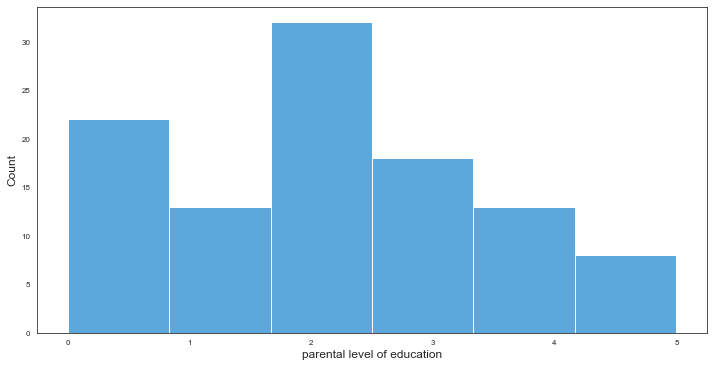

gender: male --- lunch : free/reduced --- test preparation course : completed
Average : 2.056603773584906


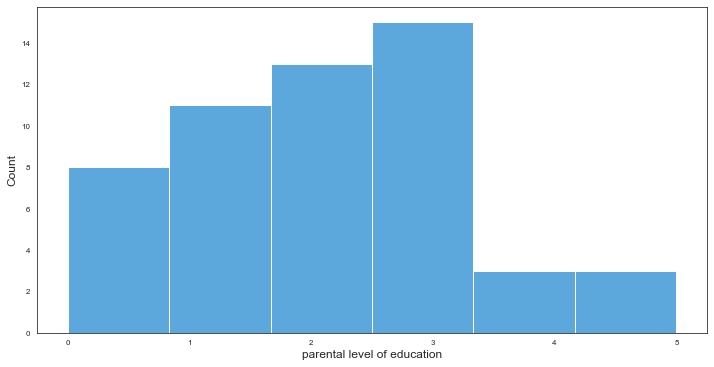

gender: female --- lunch : standard --- test preparation course : none
Average : 2.0365853658536586


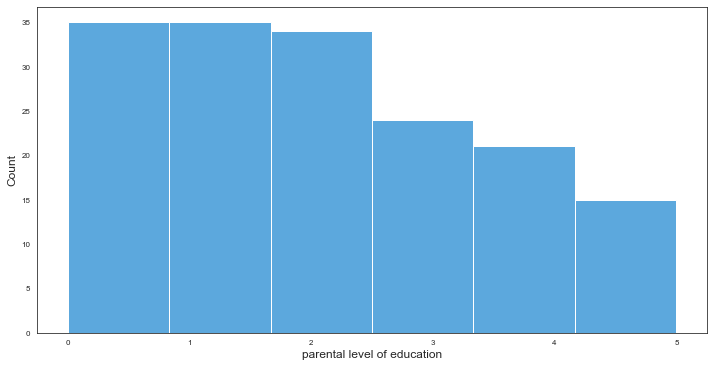

gender: female --- lunch : standard --- test preparation course : completed
Average : 2.1379310344827585


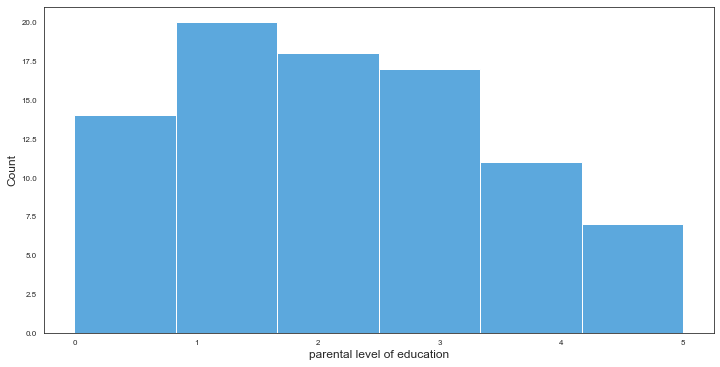

gender: female --- lunch : free/reduced --- test preparation course : none
Average : 2.043956043956044


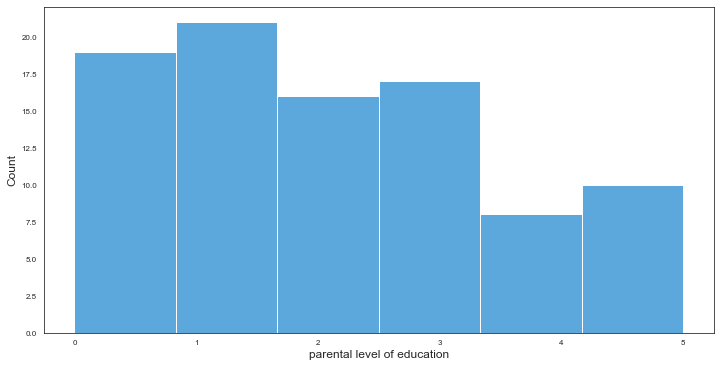

gender: female --- lunch : free/reduced --- test preparation course : completed
Average : 1.7317073170731707


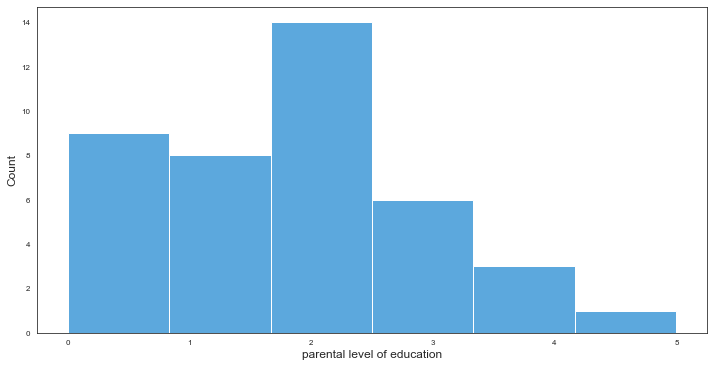

In [90]:
conditions=[]
averages=[]

for gender in ['male','female']:
    for lunch in ['standard', 'free/reduced']:
        for test_preparation_course in ['none', 'completed']:
            print (f'gender: {gender} --- lunch : {lunch} --- test preparation course : {test_preparation_course}')
            df_unique = dict_df[gender][lunch][test_preparation_course]['parental level of education']
            print (f'Average : {df_unique.sum()/len (df_unique)}')
            conditions.append(gender+'_'+lunch+ '_' + test_preparation_course )
            averages.append(df_unique.sum()/len (df_unique))
            sns.histplot (data =df_unique, bins=6)
            plt.show()
average_df =pd.DataFrame ({'Types': conditions, 'Averages': averages})

In [170]:
df.columns

Index(['gender', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [91]:
average_df.sort_values('Averages')

,Types,Averages
7,female_free/reduced_completed,1.731707
0,male_standard_none,1.902439
4,female_standard_none,2.036585
6,female_free/reduced_none,2.043956
3,male_free/reduced_completed,2.056604
2,male_free/reduced_none,2.103774
5,female_standard_completed,2.137931
1,male_standard_completed,2.202128


In [167]:
print (f"Global average on parental level of education: {df[ 'parental level of education'].sum()/df[ 'parental level of education'].count()}") 

Global average on parental level of education: 2.035


Regarding different conditions of students, there is some points to higlight:
* Female students who has reduced or free lunch conditions and completed the courses have parents with a lower level of education. This don't happen for males. 

gender: male --- lunch : standard --- test preparation course : none


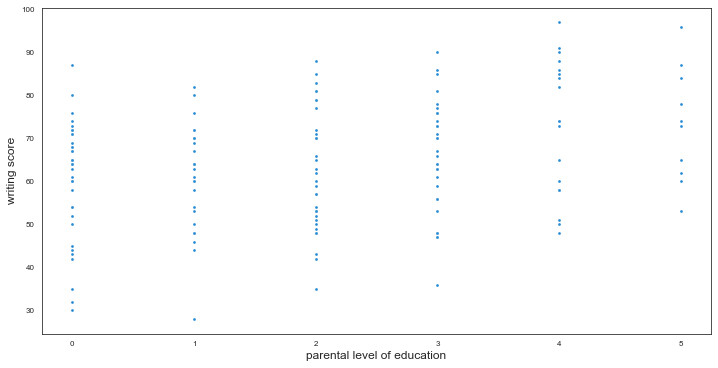

gender: male --- lunch : standard --- test preparation course : completed


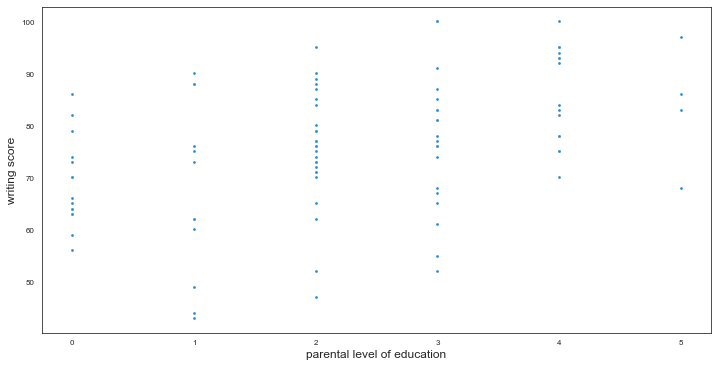

gender: male --- lunch : free/reduced --- test preparation course : none


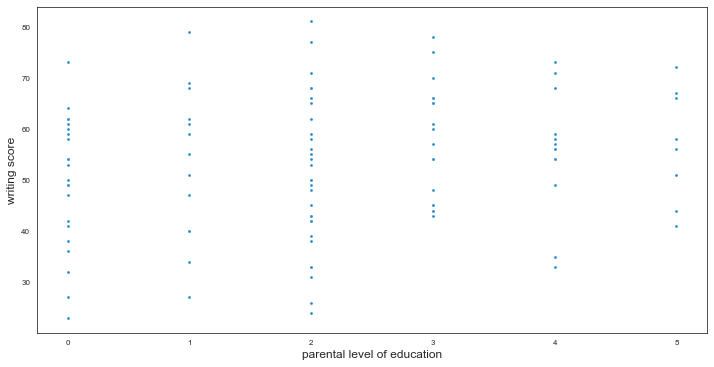

gender: male --- lunch : free/reduced --- test preparation course : completed


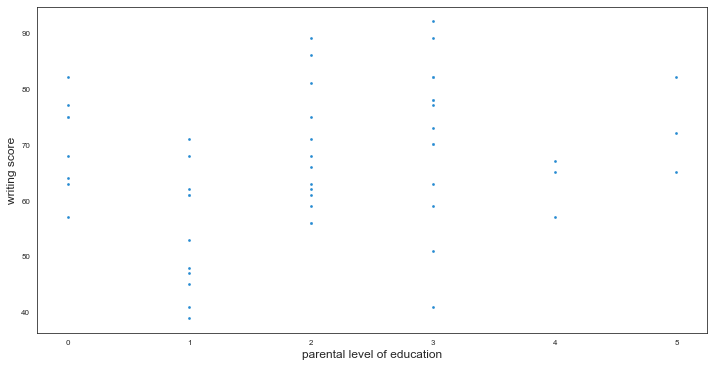

gender: female --- lunch : standard --- test preparation course : none


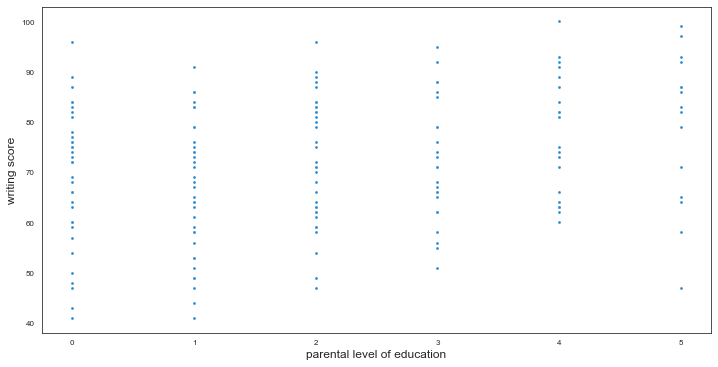

gender: female --- lunch : standard --- test preparation course : completed


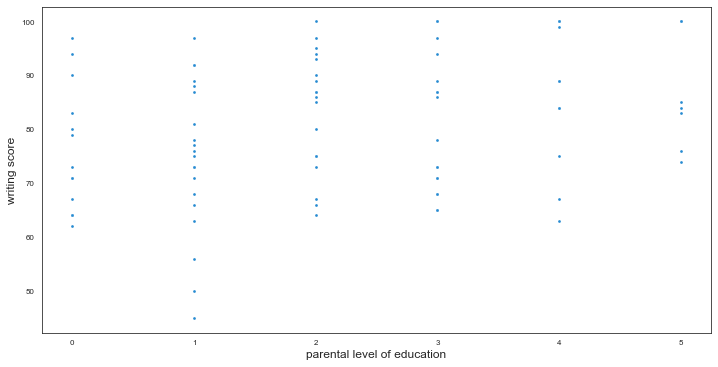

gender: female --- lunch : free/reduced --- test preparation course : none


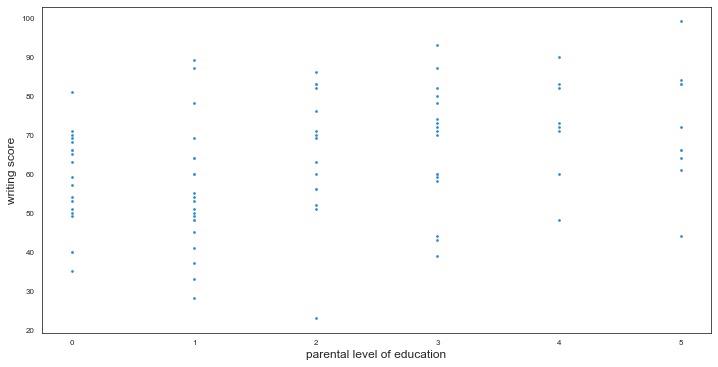

gender: female --- lunch : free/reduced --- test preparation course : completed


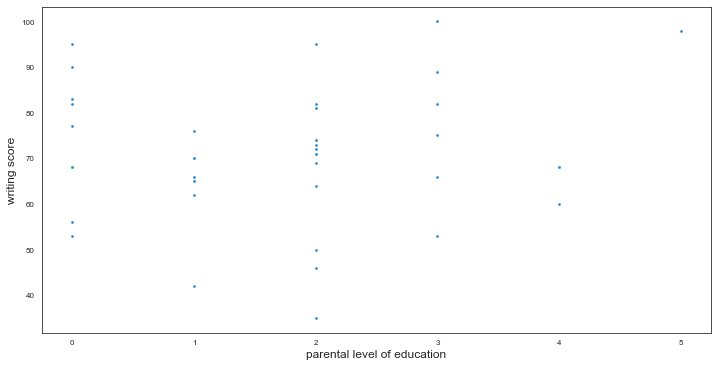

In [101]:
for gender in ['male','female']:
    for lunch in ['standard', 'free/reduced']:
        for test_preparation_course in ['none', 'completed']:
            print (f'gender: {gender} --- lunch : {lunch} --- test preparation course : {test_preparation_course}')
            df_unique = dict_df[gender][lunch][test_preparation_course]
            sns.scatterplot (data =df_unique, x='parental level of education', y= 'writing score')
            plt.show()

In [102]:
def df_dummies (df):
    new_df_with_dum = pd.get_dummies (acad_Yield_train,
                columns= ['gender',  
                'lunch',
                'test preparation course' ] 
                )
    for i in ['gender_male', 'lunch_standard', 'test preparation course_none']:
        new_df_with_dum.drop(i, axis=1, inplace=True)
    return new_df_with_dum

def avg_num_colmns (df):
    new_df= df.copy()
    new_df['average_score'] = (new_df['math score'] + new_df['reading score'] + new_df['writing score'])/3
    new_df.drop(['math score', 'reading score','writing score'], axis= 1, inplace = True)
    return new_df

def max_num_colmns (df):
    new_df= df.copy()
    new_df['max_score'] = [max (x) for x in zip(new_df['math score'] , new_df['reading score'] , new_df['writing score'])]
    new_df.drop(['math score', 'reading score','writing score'], axis= 1, inplace = True)
    return new_df


In [103]:

   def min_num_colmns (df):
        new_df= df.copy()
        new_df['min_score'] = [min (x) for x in zip(new_df['math score'] , new_df['reading score'] , new_df['writing score'])]
        new_df.drop(['math score', 'reading score','writing score'], axis= 1, inplace = True)
        return new_df 

In [104]:
acad_Yield_train_dum =  df_dummies(acad_Yield_train)


In [105]:
acad_Yield_train_dum.head(5)

,parental level of education,math score,reading score,writing score,gender_female,lunch_free/reduced,test preparation course_completed
764,1,62,76,67,1,0,0
866,4,79,57,58,0,0,0
208,2,77,86,84,1,0,0
337,0,45,46,49,1,1,0
323,3,82,83,85,0,0,1


In [106]:
acad_Yield_train_dum_max = max_num_colmns(acad_Yield_train_dum)
acad_Yield_train_dum_max

,parental level of education,gender_female,lunch_free/reduced,test preparation course_completed,max_score
764,1,1,0,0,76
866,4,0,0,0,79
208,2,1,0,0,86
337,0,1,1,0,49
323,3,0,0,1,85
...,...,...,...,...,...
272,0,0,0,1,74
853,2,0,0,1,72
894,3,0,0,0,86
179,0,0,0,1,89


In [107]:
acad_Yield_train_dum_avg = avg_num_colmns(acad_Yield_train_dum)
acad_Yield_train_dum_avg

,parental level of education,gender_female,lunch_free/reduced,test preparation course_completed,average_score
764,1,1,0,0,68.333333
866,4,0,0,0,64.666667
208,2,1,0,0,82.333333
337,0,1,1,0,46.666667
323,3,0,0,1,83.333333
...,...,...,...,...,...
272,0,0,0,1,70.000000
853,2,0,0,1,72.000000
894,3,0,0,0,80.333333
179,0,0,0,1,87.333333


In [108]:
acad_Yield_train_dum.columns

Index(['parental level of education', 'math score', 'reading score',
       'writing score', 'gender_female', 'lunch_free/reduced',
       'test preparation course_completed'],
      dtype='object')

In [109]:
acad_Yield_train_math=acad_Yield_train.copy()
acad_Yield_train_math.drop(['reading score', 'writing score'], axis= 1, inplace= True)
acad_Yield_train_math

,gender,parental level of education,lunch,test preparation course,math score
764,female,1,standard,none,62
866,male,4,standard,none,79
208,female,2,standard,none,77
337,female,0,free/reduced,none,45
323,male,3,standard,completed,82
...,...,...,...,...,...
272,male,0,standard,completed,74
853,male,2,standard,completed,72
894,male,3,standard,none,86
179,male,0,standard,completed,89


In [110]:
acad_Yield_train_dum.head(5)

,parental level of education,math score,reading score,writing score,gender_female,lunch_free/reduced,test preparation course_completed
764,1,62,76,67,1,0,0
866,4,79,57,58,0,0,0
208,2,77,86,84,1,0,0
337,0,45,46,49,1,1,0
323,3,82,83,85,0,0,1


In [112]:
X = acad_Yield_train_dum.drop('parental level of education', axis = 1).values
y = acad_Yield_train_dum['parental level of education']

numerical_cols=['math score', 
                'reading score',       
                'writing score', 
                'gender_female', 
                'lunch_free/reduced',       
                'test preparation course_completed'
                ]


In [113]:
scaler = preprocessing.StandardScaler()
acad_Yield_train_std = scaler.fit_transform(X)
acad_Yield_train_std = pd.DataFrame(acad_Yield_train_std, columns =numerical_cols)

In [117]:
acad_Yield_train_std

,math score,reading score,writing score,gender_female,lunch_free/reduced,test preparation course_completed
0,-0.291354,0.463485,-0.053009,1.043443,-0.756115,-0.723747
1,0.791570,-0.819284,-0.625215,-0.958366,-0.756115,-0.723747
2,0.664167,1.138626,1.027826,1.043443,-0.756115,-0.723747
3,-1.374279,-1.561940,-1.197421,1.043443,1.322551,-0.723747
4,0.982674,0.936084,1.091404,-0.958366,-0.756115,1.381699
...,...,...,...,...,...,...
795,0.473063,0.125914,-0.180166,-0.958366,-0.756115,1.381699
796,0.345660,0.193428,0.264884,-0.958366,-0.756115,1.381699
797,1.237480,0.530999,0.646355,-0.958366,-0.756115,-0.723747
798,1.428584,1.206140,1.154983,-0.958366,-0.756115,1.381699


In [118]:
acad_Yield_train_dum.columns

Index(['parental level of education', 'math score', 'reading score',
       'writing score', 'gender_female', 'lunch_free/reduced',
       'test preparation course_completed'],
      dtype='object')

# 3. Screen models

## 3.1. Train splitted dataframes

In [201]:
best_models = []
types = []
for gender in ['male','female']:
    for lunch in ['standard', 'free/reduced']:
        for test_preparation_course in ['none', 'completed']:
            print (f'gender: {gender} --- lunch : {lunch} --- test preparation course : {test_preparation_course}')
            df_unique = dict_df[gender][lunch][test_preparation_course][['parental level of education',  'writing score']]
            name = 'best_model__' + gender +'__' + lunch +'__' + test_preparation_course
            setup(df_unique,
                    target='parental level of education',
                    session_id=42, 
                    normalize = True,
                    fold_strategy = 'stratifiedkfold', 
                    verbose =False ,
                    silent = True        
                )
            best_models.append (compare_models())
            types.append(name)
df_best_models = pd.DataFrame  ({'type': types, 'best models': best_models})

### gender: male --- lunch : standard --- test preparation course : completed

In [130]:
setup(dict_df['male']['standard']['completed'],
                    target='parental level of education',
                    session_id=42, 
                    normalize = True,
                    fold_strategy = 'stratifiedkfold', 
                    verbose =False ,
                    silent = True        
                )
best_model_male_std_compltd=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.4000,0.2748,0.3975,0.3150,0.3194,0.2560,0.3114,2.0940
lda,Linear Discriminant Analysis,0.3833,0.2624,0.3758,0.3285,0.3141,0.2364,0.2815,0.0350
lightgbm,Light Gradient Boosting Machine,0.3714,0.2390,0.3850,0.3103,0.3083,0.2229,0.2622,0.0810
rf,Random Forest Classifier,0.3667,0.2464,0.3258,0.3221,0.3108,0.2017,0.2251,0.4880
nb,Naive Bayes,0.3595,0.2405,0.3717,0.2509,0.2628,0.2073,0.2580,0.0400
xgboost,Extreme Gradient Boosting,0.3595,0.2414,0.3375,0.2676,0.2815,0.1913,0.2269,0.3100
dt,Decision Tree Classifier,0.3524,0.2300,0.2875,0.3075,0.3102,0.1937,0.2125,0.0520
qda,Quadratic Discriminant Analysis,0.3429,0.2571,0.3133,0.2637,0.2747,0.1705,0.1974,0.0370
knn,K Neighbors Classifier,0.3143,0.2195,0.3142,0.2673,0.2624,0.1475,0.1743,0.1140
ridge,Ridge Classifier,0.3071,0.0000,0.3008,0.2273,0.2295,0.1457,0.1818,0.0350


In [140]:
labels = ['label '+ str(x) for x in list(df_m_std_c.index[:6])]

([<matplotlib.patches.Wedge at 0x1a9e8ee7348>,
 [Text(-0.5605782908254856, 0.9464417466781448, 'label 0'),
  Text(-1.0944755927589713, 0.11010529894105132, 'label 1'),
  Text(-0.4684671808142783, -1.1047798425477915, 'label 2'),
  Text(1.0127148556688088, -0.4294282490797552, 'label 3'),
  Text(0.7647117090328608, 0.7907060149436334, 'label 4'),
  Text(0.14661572284914792, 1.090185227295537, 'label 5')],
 [Text(-0.30576997681390117, 0.5162409527335334, '17%'),
  Text(-0.5969866869594389, 0.060057435786027985, '13%'),
  Text(-0.2732725221416623, -0.6444549081528782, '28%'),
  Text(0.5523899212738956, -0.23423359040713918, '22%'),
  Text(0.41711547765428764, 0.43129418996925456, '16%'),
  Text(0.07997221246317159, 0.5946464876157475, '4%')])

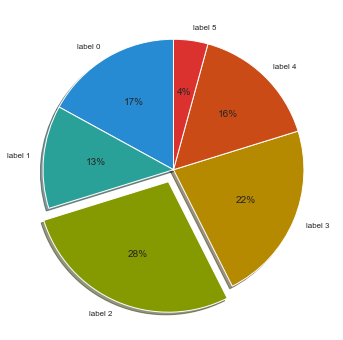

In [147]:
plt.pie(data=dict_df['male']['standard']['completed'].groupby('parental level of education').count(), x= 'writing score', labels = labels, explode=(0,0,0.1,0,0,0),  autopct='%.0f%%', shadow=True, startangle=90)

In [132]:
setup(dict_df['male']['standard']['completed'][['parental level of education','writing score']],
                    target='parental level of education',
                    session_id=42, 
                    normalize = True,
                    fold_strategy = 'stratifiedkfold', 
                    verbose =False ,
                    silent = True        
                )
best_model_male_std_compltd=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.4071,0.2138,0.4167,0.2973,0.3108,0.2651,0.3062,0.0450
qda,Quadratic Discriminant Analysis,0.4071,0.2138,0.4167,0.3042,0.3147,0.2651,0.3113,0.0260
rf,Random Forest Classifier,0.3905,0.2550,0.3650,0.3413,0.3371,0.2451,0.2742,0.4730
lda,Linear Discriminant Analysis,0.3762,0.2343,0.3825,0.3234,0.3176,0.2204,0.2491,0.0310
dt,Decision Tree Classifier,0.3714,0.2343,0.3367,0.3456,0.3317,0.2235,0.2438,0.0440
xgboost,Extreme Gradient Boosting,0.3595,0.2490,0.3433,0.2940,0.2965,0.2140,0.2414,0.2200
et,Extra Trees Classifier,0.3571,0.2205,0.3200,0.3234,0.3115,0.1990,0.2227,0.4510
lr,Logistic Regression,0.3429,0.2271,0.3425,0.2681,0.2667,0.1819,0.2099,0.0370
ridge,Ridge Classifier,0.3429,0.0000,0.3492,0.2711,0.2681,0.1873,0.2203,0.0230
lightgbm,Light Gradient Boosting Machine,0.3214,0.2664,0.3200,0.2978,0.2790,0.1674,0.1937,0.0830


### gender: female --- lunch : standard --- test preparation course : completed

In [148]:
setup(dict_df['female']['standard']['completed'],
                    target='parental level of education',
                    session_id=42, 
                    normalize = True,
                    fold_strategy = 'stratifiedkfold', 
                    verbose =False ,
                    silent = True        
                )
best_model_female_std_compltd=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.2667,0.0000,0.2475,0.1506,0.1822,0.0361,0.0475,2.4440
ridge,Ridge Classifier,0.2667,0.0000,0.2450,0.1603,0.1911,0.0394,0.0410,0.0590
knn,K Neighbors Classifier,0.2500,0.0000,0.2317,0.1694,0.1972,0.0562,0.0427,0.0890
ada,Ada Boost Classifier,0.2500,0.0000,0.2067,0.1703,0.1798,0.0391,0.0404,0.1770
nb,Naive Bayes,0.2333,0.0000,0.2092,0.2306,0.2206,0.0415,0.0337,0.0330
dt,Decision Tree Classifier,0.2333,0.0000,0.2117,0.2083,0.2106,0.0477,0.0499,0.0450
lda,Linear Discriminant Analysis,0.2333,0.0000,0.2100,0.1500,0.1767,0.0169,0.0112,0.0410
xgboost,Extreme Gradient Boosting,0.1833,0.0000,0.1800,0.1306,0.1461,-0.0169,-0.0255,0.2980
svm,SVM - Linear Kernel,0.1667,0.0000,0.1475,0.1011,0.1189,-0.0488,-0.0551,0.0760
rf,Random Forest Classifier,0.1667,0.0000,0.1458,0.1222,0.1356,-0.0466,-0.0648,0.4680


([<matplotlib.patches.Wedge at 0x1a9ed9cd708>,
 [Text(-0.5327114894405469, 0.9624024464942066, 'label 0'),
  Text(-1.1841918192151115, -0.19413844365298996, 'label 1'),
  Text(-0.03971259007862032, -1.0992829072578394, 'label 2'),
  Text(1.0359074201599385, -0.3699943470616558, 'label 3'),
  Text(0.863541103712495, 0.681393250773007, 'label 4'),
  Text(0.27509743649213075, 1.065045257458789, 'label 5')],
 [Text(-0.2905699033312074, 0.5249467889968399, '16%'),
  Text(-0.6907785612088149, -0.11324742546424413, '23%'),
  Text(-0.021661412770156537, -0.599608858504276, '21%'),
  Text(0.56504041099633, -0.20181509839726677, '20%'),
  Text(0.4710224202068154, 0.3716690458761856, '13%'),
  Text(0.15005314717752585, 0.580933776795703, '8%')])

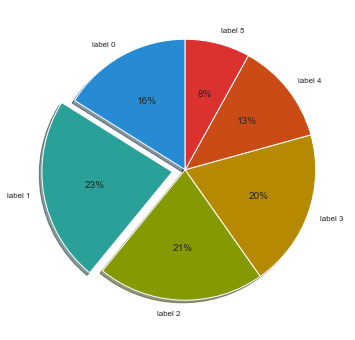

In [150]:
plt.pie(data=dict_df['female']['standard']['completed'].groupby('parental level of education').count(), x= 'writing score', labels = labels, explode=(0,0.1,0,0,0,0),  autopct='%.0f%%', shadow=True, startangle=90)

### gender: male --- lunch : free/reduced --- test preparation course : completed

In [153]:
setup(dict_df['male']['free/reduced']['completed'],
                    target='parental level of education',
                    session_id=42, 
                    normalize = True,
                    fold_strategy = 'stratifiedkfold', 
                    verbose =False ,
                    silent = True        
                )
best_model_male_fr_compltd=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.4083,0.0000,0.3950,0.2708,0.3136,0.1799,0.2255,0.0510
lr,Logistic Regression,0.3833,0.0000,0.3700,0.2417,0.2844,0.1466,0.1847,2.1590
lightgbm,Light Gradient Boosting Machine,0.3000,0.0000,0.2833,0.0958,0.1433,0.0000,0.0000,0.0430
lda,Linear Discriminant Analysis,0.2917,0.0000,0.2783,0.2125,0.2333,0.0678,0.0919,0.0330
svm,SVM - Linear Kernel,0.2833,0.0000,0.2917,0.1562,0.1933,0.0767,0.1026,0.0560
nb,Naive Bayes,0.2500,0.0000,0.2317,0.1736,0.1972,0.0458,0.0665,0.0300
ada,Ada Boost Classifier,0.2500,0.0000,0.2450,0.1361,0.1694,-0.0190,-0.0261,0.1550
et,Extra Trees Classifier,0.2250,0.0000,0.1642,0.1958,0.2042,0.0265,0.0237,0.4210
xgboost,Extreme Gradient Boosting,0.2250,0.0000,0.1775,0.1958,0.2042,0.0241,0.0397,0.3360
knn,K Neighbors Classifier,0.1833,0.0000,0.1667,0.1458,0.1583,-0.0078,-0.0090,0.1070


([<matplotlib.patches.Wedge at 0x1a9e996e548>,
 [Text(-0.6998666846212834, 0.8486380994023384, 'label 0'),
  Text(-1.0037539904548625, -0.4499754733826503, 'label 1'),
  Text(0.6132223705825147, -1.0314835549911405, 'label 2'),
  Text(0.9663635042020886, 0.5254917485044461, 'label 3'),
  Text(0.41119885998637024, 1.0202526635818745, 'label 4'),
  Text(0.0842042776766784, 1.0967723736587045, 'label 5')],
 [Text(-0.38174546433888185, 0.46289350876491175, '22%'),
  Text(-0.547502176611743, -0.24544116729962742, '20%'),
  Text(0.35771304950646693, -0.6016987404114985, '34%'),
  Text(0.5271073659284119, 0.28663186282060693, '15%'),
  Text(0.22429028726529282, 0.5565014528628406, '7%'),
  Text(0.04592960600546094, 0.5982394765411114, '2%')])

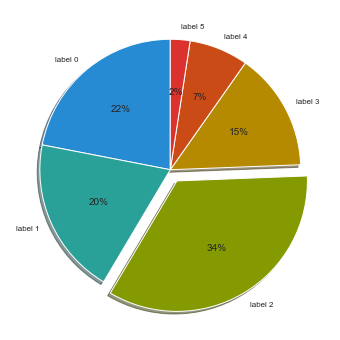

In [155]:
plt.pie(data=dict_df['female']['free/reduced']['completed'].groupby('parental level of education').count(), x= 'writing score', labels = labels, explode=(0,0,0.1,0,0,0),  autopct='%.0f%%', shadow=True, startangle=90)

### gender: female --- lunch : free/reduced --- test preparation course : completed

In [159]:
setup(dict_df['female']['free/reduced']['completed'],
                    target='parental level of education',
                    session_id=42, 
                    normalize = True,
                    fold_strategy = 'stratifiedkfold', 
                    verbose =False ,
                    silent = True        
                )
best_model_female_fr_compltd=compare_models()

In [ ]:
plt.pie(data=dict_df['female']['free/reduced']['completed'].groupby('parental level of education').count(), x= 'writing score', labels = labels, explode=(0,0,0.1,0,0,0),  autopct='%.0f%%', shadow=True, startangle=90)

### gender: male --- lunch : free/reduced --- test preparation course : none

In [162]:
setup(dict_df['male']['free/reduced']['none'],
                    target='parental level of education',
                    session_id=42, 
                    normalize = True,
                    fold_strategy = 'stratifiedkfold', 
                    verbose =False ,
                    silent = True        
                )
best_model_male_fr_none=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.2946,0.2046,0.1578,0.1159,0.1656,-0.0576,-0.0881,2.2920
ridge,Ridge Classifier,0.2821,0.0000,0.1522,0.1154,0.1626,-0.0641,-0.0957,0.0290
svm,SVM - Linear Kernel,0.2732,0.0000,0.2300,0.1863,0.2079,0.0573,0.0615,0.0500
knn,K Neighbors Classifier,0.2571,0.2309,0.1767,0.1671,0.1925,0.0046,0.0029,0.1000
nb,Naive Bayes,0.2554,0.1896,0.1944,0.2125,0.2041,0.0481,0.0526,0.0390
rf,Random Forest Classifier,0.2446,0.2195,0.1956,0.2218,0.2196,0.0287,0.0260,0.6160
ada,Ada Boost Classifier,0.2446,0.2043,0.1861,0.2283,0.2131,0.0357,0.0368,0.1140
et,Extra Trees Classifier,0.2286,0.2291,0.1622,0.2048,0.1987,0.0144,0.0167,0.4270
lda,Linear Discriminant Analysis,0.2268,0.2200,0.1200,0.0916,0.1296,-0.1022,-0.1304,0.0360
lightgbm,Light Gradient Boosting Machine,0.2232,0.2089,0.1150,0.1330,0.1617,-0.0715,-0.0908,0.0640


([<matplotlib.patches.Wedge at 0x1a9ee03ee48>,
 [Text(-0.6674801688955252, 0.874339879069462, 'label 0'),
  Text(-1.0922792023398187, -0.1301005155096999, 'label 1'),
  Text(-0.14192775142885097, -1.1915773216096177, 'label 2'),
  Text(1.0764121567392182, -0.22657640835714823, 'label 3'),
  Text(0.8332623083410737, 0.7181043973532717, 'label 4'),
  Text(0.2583745540286561, 1.0692252287663686, 'label 5')],
 [Text(-0.3640800921248319, 0.47691266131061555, '21%'),
  Text(-0.5957886558217192, -0.0709639175507454, '12%'),
  Text(-0.0827911883334964, -0.6950867709389437, '30%'),
  Text(0.5871339036759371, -0.12358713183117175, '17%'),
  Text(0.4545067136405856, 0.39169330764723903, '12%'),
  Text(0.1409315749247215, 0.5832137611452919, '8%')])

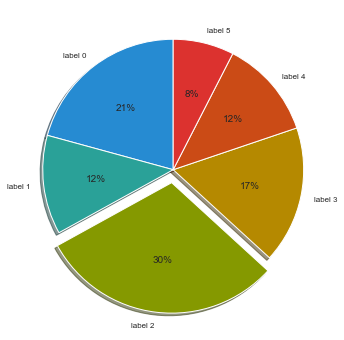

In [165]:
plt.pie(data=dict_df['male']['free/reduced']['none'].groupby('parental level of education').count(), x= 'writing score', labels = labels, explode=(0,0,0.1,0,0,0),  autopct='%.0f%%', shadow=True, startangle=90)

### gender: female --- lunch : free/reduced --- test preparation course : none

In [166]:
setup(dict_df['female']['free/reduced']['none'],
                    target='parental level of education',
                    session_id=42, 
                    normalize = True,
                    fold_strategy = 'stratifiedkfold', 
                    verbose =False ,
                    silent = True        
                )
best_model_female_fr_none=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.3381,0.0000,0.2950,0.2855,0.2846,0.1715,0.1921,0.0720
knn,K Neighbors Classifier,0.3095,0.0000,0.2850,0.2404,0.2498,0.1132,0.1218,0.1000
xgboost,Extreme Gradient Boosting,0.3095,0.0000,0.3067,0.2743,0.2663,0.1528,0.1728,0.2520
gbc,Gradient Boosting Classifier,0.3048,0.0000,0.2850,0.2330,0.2497,0.1318,0.1432,0.5350
nb,Naive Bayes,0.2762,0.0000,0.2067,0.2095,0.2253,0.0825,0.1002,0.0330
dt,Decision Tree Classifier,0.2714,0.0000,0.2433,0.2246,0.2274,0.0957,0.1070,0.0640
et,Extra Trees Classifier,0.2310,0.0000,0.2067,0.1813,0.1829,0.0433,0.0514,0.4300
rf,Random Forest Classifier,0.2286,0.0000,0.1950,0.1828,0.1789,0.0333,0.0399,0.4210
ada,Ada Boost Classifier,0.2262,0.0000,0.2250,0.1068,0.1394,0.0223,0.0383,0.1610
ridge,Ridge Classifier,0.2238,0.0000,0.2083,0.1575,0.1619,0.0145,0.0164,0.0410


([<matplotlib.patches.Wedge at 0x1a9ef1b7648>,
 [Text(-0.6674801688955252, 0.874339879069462, 'label 0'),
  Text(-1.0922792023398187, -0.1301005155096999, 'label 1'),
  Text(-0.14192775142885097, -1.1915773216096177, 'label 2'),
  Text(1.0764121567392182, -0.22657640835714823, 'label 3'),
  Text(0.8332623083410737, 0.7181043973532717, 'label 4'),
  Text(0.2583745540286561, 1.0692252287663686, 'label 5')],
 [Text(-0.3640800921248319, 0.47691266131061555, '21%'),
  Text(-0.5957886558217192, -0.0709639175507454, '12%'),
  Text(-0.0827911883334964, -0.6950867709389437, '30%'),
  Text(0.5871339036759371, -0.12358713183117175, '17%'),
  Text(0.4545067136405856, 0.39169330764723903, '12%'),
  Text(0.1409315749247215, 0.5832137611452919, '8%')])

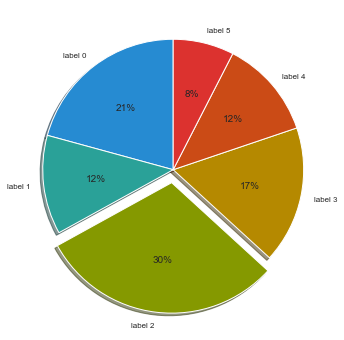

In [168]:
plt.pie(data=dict_df['male']['free/reduced']['none'].groupby('parental level of education').count(), x= 'writing score', labels = labels, explode=(0,0,0.1,0,0,0),  autopct='%.0f%%', shadow=True, startangle=90)

### gender: male --- lunch : standard --- test preparation course : none

In [169]:
setup(dict_df['male']['standard']['none'],
                    target='parental level of education',
                    session_id=42, 
                    normalize = True,
                    fold_strategy = 'stratifiedkfold', 
                    verbose =False ,
                    silent = True        
                )
best_model_male_std_none=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.2636,0.2715,0.2328,0.2260,0.2199,0.0688,0.0761,0.0880
nb,Naive Bayes,0.2636,0.2655,0.2167,0.1803,0.1979,0.0969,0.1095,0.0430
lightgbm,Light Gradient Boosting Machine,0.2614,0.2709,0.2211,0.2579,0.2483,0.0795,0.0831,0.0850
ada,Ada Boost Classifier,0.2545,0.2899,0.1978,0.1779,0.1938,0.0626,0.0662,0.1770
gbc,Gradient Boosting Classifier,0.2545,0.2685,0.2244,0.2556,0.2349,0.0717,0.0757,0.5540
rf,Random Forest Classifier,0.2371,0.2584,0.1956,0.2621,0.2280,0.0436,0.0463,0.5150
qda,Quadratic Discriminant Analysis,0.2371,0.2550,0.2000,0.2086,0.1989,0.0423,0.0471,0.0310
xgboost,Extreme Gradient Boosting,0.2174,0.2651,0.1922,0.1859,0.1892,0.0220,0.0247,0.2440
svm,SVM - Linear Kernel,0.2121,0.0000,0.2156,0.1270,0.1476,0.0161,0.0211,0.0500
et,Extra Trees Classifier,0.2083,0.2701,0.1722,0.2101,0.1962,0.0057,0.0063,0.4610


([<matplotlib.patches.Wedge at 0x1a9edf628c8>,
 [Text(-0.7925737390259934, 0.7627757653507069, 'label 0'),
  Text(-0.9116794316682314, -0.6155002955913919, 'label 1'),
  Text(0.27342411863041527, -1.168434530194645, 'label 2'),
  Text(1.0949582236336284, -0.10519737875578926, 'label 3'),
  Text(0.7318583536327437, 0.8212084694022402, 'label 4'),
  Text(0.20943032611869689, 1.0798791314317617, 'label 5')],
 [Text(-0.4323129485596327, 0.4160595083731128, '26%'),
  Text(-0.4972796900008534, -0.33572743395894095, '18%'),
  Text(0.15949740253440886, -0.6815868092802095, '21%'),
  Text(0.5972499401637973, -0.05738038841224868, '19%'),
  Text(0.3991954656178602, 0.4479318924012219, '11%'),
  Text(0.11423472333747102, 0.5890249807809609, '6%')])

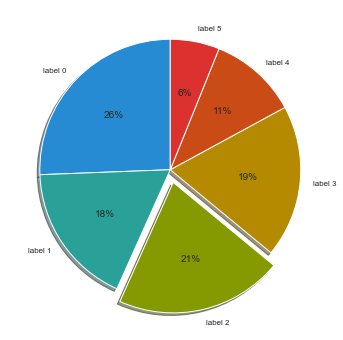

In [170]:
plt.pie(data=dict_df['male']['standard']['none'].groupby('parental level of education').count(), x= 'writing score', labels = labels, explode=(0,0,0.1,0,0,0),  autopct='%.0f%%', shadow=True, startangle=90)

### gender: female --- lunch : standard --- test preparation course : none

In [171]:
setup(dict_df['female']['standard']['none'],
                    target='parental level of education',
                    session_id=42, 
                    normalize = True,
                    fold_strategy = 'stratifiedkfold', 
                    verbose =False ,
                    silent = True        
                )
best_model_female_std_none=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.2894,0.5695,0.2417,0.2406,0.2353,0.1060,0.1192,0.0600
lda,Linear Discriminant Analysis,0.2803,0.5844,0.2306,0.2388,0.2344,0.0972,0.1078,0.0330
ridge,Ridge Classifier,0.2621,0.0000,0.2167,0.2165,0.2142,0.0747,0.0865,0.0270
qda,Quadratic Discriminant Analysis,0.2470,0.5249,0.2056,0.2004,0.1999,0.0619,0.0638,0.0230
svm,SVM - Linear Kernel,0.2424,0.0000,0.2306,0.1823,0.1862,0.0714,0.0830,0.0770
knn,K Neighbors Classifier,0.2371,0.5562,0.1972,0.1920,0.1949,0.0493,0.0522,0.0900
lightgbm,Light Gradient Boosting Machine,0.2364,0.5511,0.2056,0.2216,0.2153,0.0590,0.0618,0.1020
nb,Naive Bayes,0.2197,0.4743,0.1806,0.1259,0.1448,0.0222,0.0239,0.0380
ada,Ada Boost Classifier,0.2030,0.5364,0.1694,0.1881,0.1706,0.0143,0.0184,0.1300
dt,Decision Tree Classifier,0.1848,0.5024,0.1556,0.1883,0.1712,0.0026,0.0032,0.0250


In [174]:
plt.pie(data=dict_df['female']['standard']['none'].groupby('parental level of education').count(), x= 'writing score', labels = labels, explode=(0,0,0.1,0,0,0),  autopct='%.0f%%', shadow=True, startangle=90, title= 'female -- standard -- none')

TypeError: pie() got an unexpected keyword argument 'title'

## 3.2 Screening with Pycaret different dataframes

With Pycaret, several models can be screened with few lines of code.

In [120]:
setup(acad_Yield_train,
          target='parental level of education',
          session_id=42, 
          normalize = True,
          fold_strategy = 'stratifiedkfold', 
          verbose =False ,
          silent = True        
    )
best_model_basic=compare_models() 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.2432,0.5596,0.2196,0.2472,0.2358,0.0667,0.0682,0.0310
nb,Naive Bayes,0.2093,0.5656,0.1921,0.1883,0.1741,0.0287,0.0306,0.0310
lda,Linear Discriminant Analysis,0.2056,0.5707,0.1886,0.1943,0.1935,0.0202,0.0208,0.0290
svm,SVM - Linear Kernel,0.2042,0.0000,0.1863,0.1532,0.1596,0.0209,0.0217,0.0560
lr,Logistic Regression,0.2021,0.5669,0.1816,0.1921,0.1881,0.0126,0.0130,2.1430
gbc,Gradient Boosting Classifier,0.2004,0.5231,0.1790,0.1985,0.1961,0.0170,0.0170,0.7540
rf,Random Forest Classifier,0.2002,0.5288,0.1765,0.1921,0.1927,0.0165,0.0168,0.5370
ada,Ada Boost Classifier,0.1986,0.5403,0.1821,0.1985,0.1883,0.0113,0.0114,0.1530
xgboost,Extreme Gradient Boosting,0.1950,0.5196,0.1736,0.1924,0.1907,0.0146,0.0146,0.4270
ridge,Ridge Classifier,0.1895,0.0000,0.1679,0.1924,0.1745,-0.0052,-0.0050,0.0270


In [122]:
predict_model(best_model_basic)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Quadratic Discriminant Analysis,0.2241,0.5437,0.2000,0.2386,0.2264,0.0308,0.0314


,math score,reading score,writing score,gender_female,lunch_free/reduced,test preparation course_completed,parental level of education,Label,Score
0,-0.349542,-0.469606,-0.415885,1.0,0.0,0.0,1,0,0.3168
1,-0.219192,0.068186,0.218785,1.0,0.0,0.0,2,1,0.2226
2,0.171856,1.009323,0.916923,0.0,1.0,1.0,3,2,0.4152
3,0.693254,0.471531,0.345720,0.0,0.0,0.0,5,3,0.2221
4,-0.870939,-0.604055,-0.733221,1.0,0.0,0.0,1,1,0.3578
...,...,...,...,...,...,...,...,...,...
236,-1.653036,-1.343519,-1.177490,1.0,0.0,0.0,1,1,0.3561
237,1.475350,1.614340,2.059330,1.0,0.0,1.0,4,2,0.2891
238,0.888778,1.412667,1.424660,1.0,0.0,0.0,2,4,0.2639
239,-0.479891,-0.066262,-0.035083,1.0,0.0,1.0,2,1,0.3759


In [124]:
setup(acad_Yield_train_dum_avg,
          target='parental level of education',
          session_id=42, 
          normalize = True,
          fold_strategy = 'stratifiedkfold', 
          verbose =False ,
          #silent = True        
    )
best_model_rfc=compare_models() 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.2325,0.5510,0.2065,0.2313,0.2231,0.0512,0.0519,0.0280
knn,K Neighbors Classifier,0.2165,0.5341,0.1845,0.1976,0.1963,0.0281,0.0290,0.1170
ada,Ada Boost Classifier,0.2129,0.5293,0.1900,0.2236,0.1965,0.0237,0.0244,0.1270
dt,Decision Tree Classifier,0.2093,0.5152,0.1818,0.1973,0.2001,0.0298,0.0298,0.0290
rf,Random Forest Classifier,0.1969,0.5264,0.1712,0.1902,0.1901,0.0178,0.0180,0.4770
lda,Linear Discriminant Analysis,0.1949,0.5561,0.1718,0.1799,0.1789,0.0016,0.0016,0.0290
lr,Logistic Regression,0.1931,0.5570,0.1673,0.1762,0.1750,-0.0029,-0.0029,0.0450
svm,SVM - Linear Kernel,0.1931,0.0000,0.1789,0.1421,0.1412,0.0109,0.0138,0.0470
lightgbm,Light Gradient Boosting Machine,0.1930,0.5223,0.1762,0.1888,0.1858,0.0115,0.0117,0.3120
nb,Naive Bayes,0.1896,0.5503,0.1642,0.1711,0.1670,-0.0073,-0.0075,0.0340


In [125]:
setup(acad_Yield_train_math,
          target='parental level of education',
          session_id=42, 
          normalize = True,
          fold_strategy = 'stratifiedkfold', 
          verbose =False ,
          #silent = True        
    )
best_model_rfc=compare_models() 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.2128,0.5345,0.1835,0.2155,0.2031,0.0232,0.0237,0.0270
rf,Random Forest Classifier,0.2092,0.5110,0.1882,0.2013,0.2006,0.0313,0.0317,0.5000
lightgbm,Light Gradient Boosting Machine,0.2056,0.5176,0.1850,0.2033,0.1992,0.0279,0.0284,0.2690
svm,SVM - Linear Kernel,0.2040,0.0000,0.1829,0.1190,0.1376,0.0197,0.0198,0.0580
et,Extra Trees Classifier,0.2040,0.5156,0.1788,0.1866,0.1882,0.0173,0.0178,0.4310
xgboost,Extreme Gradient Boosting,0.2038,0.5070,0.1848,0.1987,0.1984,0.0277,0.0278,0.3070
dt,Decision Tree Classifier,0.1949,0.5103,0.1704,0.1767,0.1803,0.0076,0.0080,0.0310
knn,K Neighbors Classifier,0.1931,0.5051,0.1703,0.1906,0.1803,-0.0008,-0.0006,0.0930
nb,Naive Bayes,0.1896,0.5391,0.1647,0.1920,0.1691,-0.0092,-0.0102,0.0270
lda,Linear Discriminant Analysis,0.1878,0.5504,0.1628,0.1729,0.1694,-0.0101,-0.0105,0.0270


In [126]:
acad_Yield_train_std['parental level of education'] = acad_Yield_train['parental level of education']

In [127]:
setup(acad_Yield_train_std,
          target='parental level of education',
          session_id=42, 
          normalize = True,
          fold_strategy = 'stratifiedkfold', 
          verbose =False ,
          #silent = True        
    )
best_model_rfc=compare_models() 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.2537,0.0000,0.1945,0.1749,0.2038,0.0453,0.0479,0.0260
lr,Logistic Regression,0.2445,0.5426,0.1878,0.1689,0.1973,0.0337,0.0356,0.0480
nb,Naive Bayes,0.2441,0.5266,0.1903,0.1668,0.1921,0.0412,0.0445,0.0250
lda,Linear Discriminant Analysis,0.2422,0.5394,0.1881,0.1741,0.2001,0.0342,0.0360,0.0270
ada,Ada Boost Classifier,0.2351,0.5188,0.1912,0.2030,0.2111,0.0416,0.0430,0.1210
gbc,Gradient Boosting Classifier,0.2215,0.5478,0.1842,0.2161,0.2130,0.0307,0.0309,0.6020
dt,Decision Tree Classifier,0.2212,0.5231,0.2007,0.2350,0.2206,0.0457,0.0464,0.0290
lightgbm,Light Gradient Boosting Machine,0.2192,0.5298,0.1879,0.2105,0.2127,0.0319,0.0322,0.2030
xgboost,Extreme Gradient Boosting,0.2101,0.5283,0.1755,0.1903,0.1950,0.0220,0.0225,0.2840
svm,SVM - Linear Kernel,0.1942,0.0000,0.1628,0.1382,0.1418,0.0025,0.0027,0.0530


In [128]:
setup(acad_Yield_train_dum_max,
          target='parental level of education',
          session_id=42, 
          normalize = True,
          fold_strategy = 'stratifiedkfold', 
          verbose =False ,
          #silent = True        
    )
best_model_rfc=compare_models() 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.2307,0.5326,0.2021,0.2198,0.2151,0.0484,0.0498,0.0970
qda,Quadratic Discriminant Analysis,0.2164,0.5559,0.1916,0.2124,0.2078,0.0316,0.0320,0.0310
ada,Ada Boost Classifier,0.2021,0.5253,0.1780,0.1985,0.1889,0.0122,0.0128,0.1460
et,Extra Trees Classifier,0.2003,0.5176,0.1732,0.1716,0.1794,0.0133,0.0135,0.5500
dt,Decision Tree Classifier,0.1968,0.5053,0.1697,0.1732,0.1778,0.0088,0.0086,0.0310
gbc,Gradient Boosting Classifier,0.1967,0.5278,0.1764,0.1868,0.1846,0.0134,0.0138,0.7110
rf,Random Forest Classifier,0.1896,0.5210,0.1705,0.1824,0.1824,0.0094,0.0096,0.5200
nb,Naive Bayes,0.1879,0.5539,0.1625,0.1756,0.1687,-0.0089,-0.0095,0.0340
lightgbm,Light Gradient Boosting Machine,0.1860,0.5241,0.1650,0.1800,0.1772,0.0029,0.0030,0.4920
lr,Logistic Regression,0.1842,0.5542,0.1633,0.1842,0.1720,-0.0132,-0.0135,1.9250


In [ ]:
acad_Yield_train_dum_max

# 6. Results & Conclusions

# 7. References

# 8. Other

In [93]:
# Saving in a text file all installed libraries in the environment used to run this project.
!pip freeze > requirements.txt 